# Personal Loan Modelling

=========================================================================================================================
<br>
**<i>For best experience, open this notebook in 'Trusted' mode. There are some diagrams in this notebook that need Javascript enabled.</i>**
<br>
![image-2.png](attachment:image-2.png)

=========================================================================================================================

## Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

**The goal of this project is to create a profile for what kinds of customers were more likely to buy a personal loan last campaign. To accomplish this goal, we will run a logistic regression and build a decision tree to get the most important features. The most important measure of model success will be recall as the cost of missing a potential customer is higher than soliciting someone who is uninterested. Recall is followed closely by accuracy. Ideally, we want false negatives to be as close to zero as possible while maintaining a high accuracy. We'll be using AUC-ROC curves to fine-tune the models.**

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
Advise the marketing department on what sorts of people are most likely to respond to the marketing techniques they used last year. That way they can develop other marketing techniques to expand the number of customers who take the loan while continuing to have success with the identified group.

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.


## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Importing Basic Libraries 

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

## Loading the Dataset

In [ ]:
df = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

## Understanding the data

### Structure and Shape

In [ ]:
df.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [ ]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [ ]:
df.drop(["ID"], inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(5000, 13)

<IPython.core.display.Javascript object>

**Observations:**
1. There are **5000 rows** and **13 columns** in the dataset (after dropping the ID column)
2. **No duplicate records** in the dataset

### Checking Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

In [ ]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
1. No missing values in the dataset

### Datatypes

In [ ]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

<IPython.core.display.Javascript object>

**Observations:**
1. All columns are numerical

## Data-Preprocessing

There is a ZipCode column in the dataset. Extract more information (State/County etc) about the location.

In [ ]:
from uszipcode import SearchEngine

<IPython.core.display.Javascript object>

In [ ]:
search = SearchEngine(simple_zipcode=True)

<IPython.core.display.Javascript object>

In [ ]:
df["state"] = df.ZIPCode.apply(lambda x: search.by_zipcode(x).state)

<IPython.core.display.Javascript object>

In [ ]:
df["county"] = df.ZIPCode.apply(lambda x: search.by_zipcode(x).county)

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  state               4966 non-null   object 
 14  county              4966 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 586.1

<IPython.core.display.Javascript object>

In [ ]:
df.state.value_counts()

CA    4966
Name: state, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
df.county.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

<IPython.core.display.Javascript object>

In [ ]:
df.county.isna().sum()

34

<IPython.core.display.Javascript object>

**Observations:**
1. All the zip codes are from the state of **California (CA)**
2. Since there is no variance in the state data, we will drop the field
3. There are 34 unknowns in the county column

In [ ]:
df.drop("state", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
#Treat the missing values as a separate category 'unknown'
df.county.fillna("Unknown", inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
grpbyCOUNTYNAME = (
    df.groupby("county", squeeze=True)
    .Personal_Loan.agg(["sum", "count"])
    .sort_values(by="count", ascending=False)
)
grpbyCOUNTYNAME

,sum,count
county,,
Los Angeles County,111,1095
San Diego County,59,568
Santa Clara County,71,563
Alameda County,44,500
Orange County,30,339
San Francisco County,19,257
San Mateo County,12,204
Sacramento County,15,184
Santa Barbara County,11,154


<IPython.core.display.Javascript object>

In [ ]:
df.county.nunique()

39

<IPython.core.display.Javascript object>

**Observations:**
1. The data is not uniform. There is lots of data (customers) from a few counties, but not so much from some others.
2. There are **39 distinct** counties in the data.
3. It will be better to put the **'Rare' counties** in a separate county bucket.

In [ ]:
#Use 50 samples as the cutoff value
df["county_modified"] = df.county.apply(
    lambda x: "Rare" if x in grpbyCOUNTYNAME[grpbyCOUNTYNAME["count"] < 50].index else x
)

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  county              5000 non-null   object 
 14  county_modified     5000 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 586.1

<IPython.core.display.Javascript object>

In [ ]:
df.ZIPCode.nunique()

467

<IPython.core.display.Javascript object>

In [ ]:
df.county_modified.nunique()

19

<IPython.core.display.Javascript object>

**Observations:**
1. There are 19 unique county categories left, whereas originally there were 467 diffferent ZIPCodes in the data.
2. Extracted the usable info from the ZIPCode column and the original 'country' column which is unnecessary.

In [ ]:
df2 = df.drop(["ZIPCode", "county"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  county_modified     5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


<IPython.core.display.Javascript object>

In [ ]:
grpby_county_modified = (
    df2.groupby("county_modified", squeeze=True)
    .Personal_Loan.agg(["sum", "count"])
    .sort_values(by="count", ascending=False)
)
grpby_county_modified

,sum,count
county_modified,,
Los Angeles County,111,1095
San Diego County,59,568
Santa Clara County,71,563
Alameda County,44,500
Rare,32,346
Orange County,30,339
San Francisco County,19,257
San Mateo County,12,204
Sacramento County,15,184


<IPython.core.display.Javascript object>

**Observations:**
1. The 'Unknown' counties have merged into the 'Rare' category, as there were less than 50 samples (our cut-off) from Unknown category.

In [ ]:
df2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county_modified
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

**Observations:**
1. There are negative values in Experience column

In [ ]:
sns.set(color_codes=True)


def univariate_plts(data, colname, discrete=False, hue=None):
    display(data[colname].describe())  # Summary
    plt.figure(figsize=(15, 7))  # Defining the figure and figuresize

    plt.subplot(3, 1, (1, 2))
    sns.histplot(data=data, x=colname, kde=True, discrete=discrete, hue=hue).set(
        xlabel=None
    )  # subplot 1: histogram
    plt.title(colname + " Distribution")

    if discrete == False:
        plt.axvline(data[colname].mean(), label="Mean", color="r")
        plt.text(x=data[colname].mean(), y=15, s="Mean", color="black")

    plt.subplot(3, 1, 3)
    sns.boxplot(data=data, x=colname, width=0.5)  # subplot 2: boxplot

    ##-- Outlier flags ---##
    Q3 = np.nanquantile(data[colname], 0.75)
    Q1 = np.nanquantile(data[colname], 0.25)
    IQR = Q3 - Q1
    if Q3 + 3 * IQR < data[colname].max():
        plt.axvline(Q3 + 3 * IQR, color="r")
        plt.text(x=Q3 + 3 * IQR, y=-0.3, s="Q3 + 3*IQR", color="black", fontsize=9)
        if Q3 + 4.5 * IQR < data[colname].max():
            plt.axvline(Q3 + 4.5 * IQR, color="r")
            plt.text(
                x=Q3 + 4.5 * IQR, y=0.35, s="Q3 + 4.5*IQR", color="black", fontsize=9
            )

    if Q1 - 3 * IQR > data[colname].min():
        plt.axvline(Q1 - 3 * IQR, color="r")
        plt.text(x=Q1 - 3 * IQR, y=-0.2, s="Q1 - 3*IQR", color="black", fontsize=9)
        if Q1 - 4.5 * IQR > data[colname].min():
            plt.axvline(Q1 - 4.5 * IQR, color="r")
            plt.text(
                x=Q1 - 4.5 * IQR, y=0.2, s="Q1 - 4.5*IQR", color="black", fontsize=9
            )
    plt.show()


def labeled_barplot(
    data, colname, perc=False, ascending=True, n=None, size=6, vertical=True
):
    """
    Barplot with percentage at the top

    data: dataframe
    colname: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[colname])  # length of the column
    count = data[colname].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, size))
    else:
        plt.figure(figsize=(n + 1, size))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=colname,
        palette="Paired",
        order=data[colname].value_counts().sort_values(ascending=ascending).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = f"{np.round(100 * p.get_height() / total, 1)}%"

        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [ ]:
## Function to get potential outliers ##
def get_outliers(data, colname, iqr_multiplier=3, tail="lr"):
    Q3 = np.nanquantile(data[colname], 0.75)
    Q1 = np.nanquantile(data[colname], 0.25)
    IQR = Q3 - Q1

    if tail == "lr":
        outliers = data[
            (data[colname] > (Q3 + iqr_multiplier * IQR))
            | (data[colname] < (Q1 - iqr_multiplier * IQR))
        ]
    elif tail == "l":
        outliers = data[(data[colname] < (Q1 - iqr_multiplier * IQR))]
    elif tail == "r":
        outliers = data[(data[colname] > (Q3 + iqr_multiplier * IQR))]
    return outliers

<IPython.core.display.Javascript object>

### Age

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

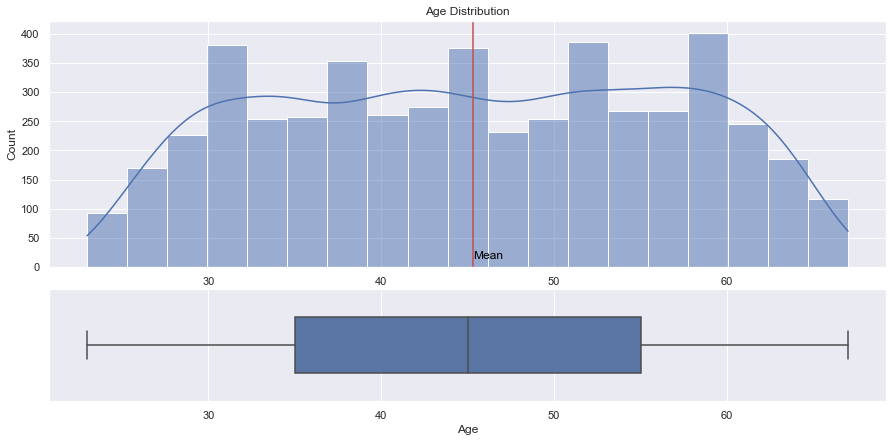

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "Age")

**Observations:**
1. Very Uniform distribution.
2. No outliers
3. Mean almost equal to Median.

### Experience

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

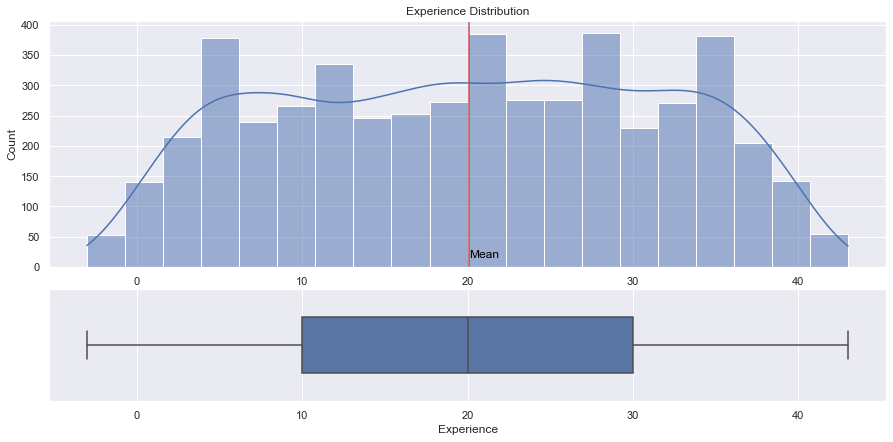

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "Experience")

**Observations:**
1. Very Uniform distribution.
2. No outliers
3. Mean almost equal to Median.
4. Negative values present

### Income

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

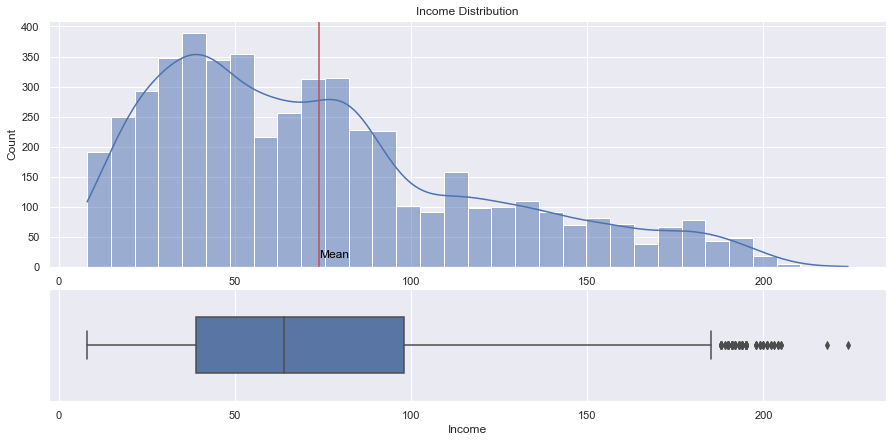

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "Income")

**Observations:**
1. Right skewed distribution.
2. Some potential outliers.
3. Mean > Median.

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

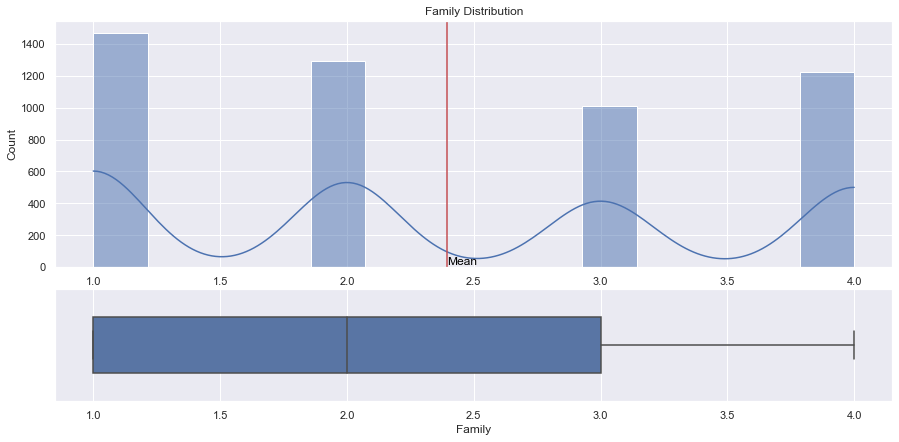

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "Family")

**Observations:**
1. Discrete in nature. 4 unique values.
2. Most of the customers have Family size 1, followed by 2, 4 and then 3.

### CCAvg

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

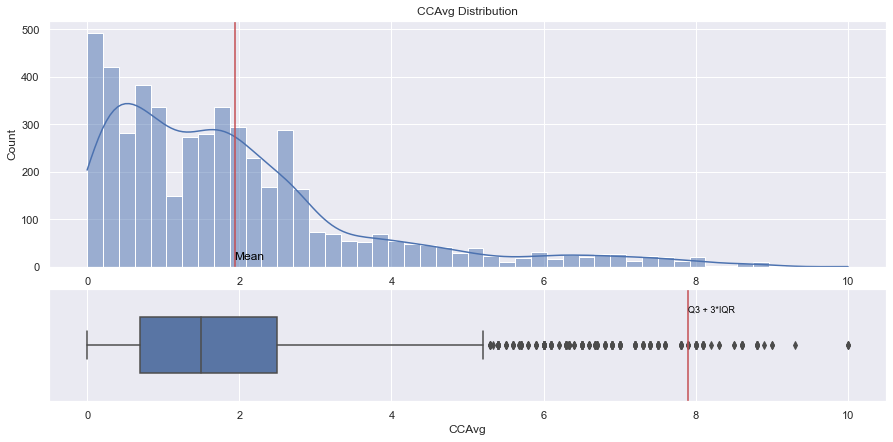

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "CCAvg")

**Observations:**
1. Right skewed distribution.
2. Potential outliers at the higher side.
3. Central tendency is around 2000 dollars, but Median < Mean.

### Education

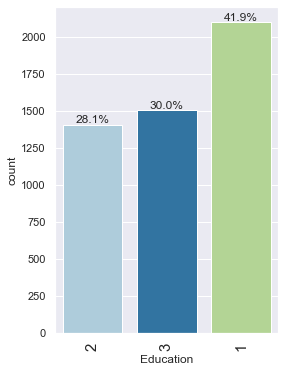

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df2, "Education", perc=True)

**Observations:**
1. Discrete in nature.
2. Most of the customers are have Education level 1, followed by 3 (Advanced), and then finally 2.

### Mortgage

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

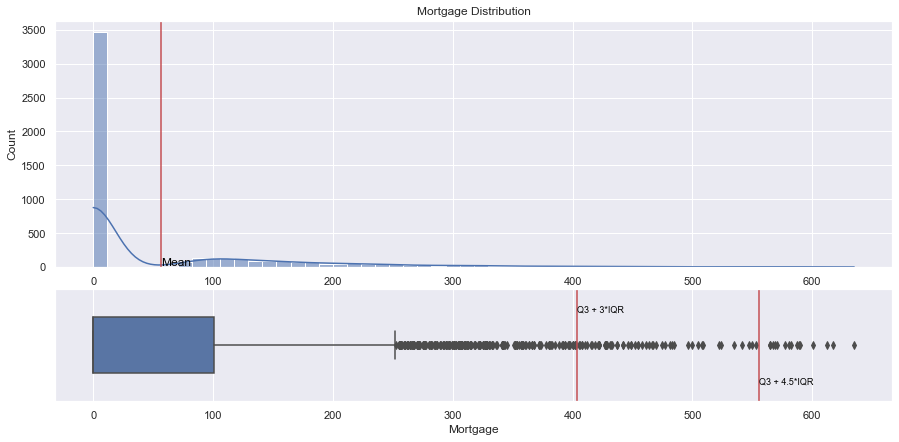

<IPython.core.display.Javascript object>

In [ ]:
univariate_plts(df2, "Mortgage")

In [ ]:
len(df2.Mortgage[df.Mortgage == 0]) / len(df2.Mortgage) * 100

69.24

<IPython.core.display.Javascript object>

**Observations:**
1. A lot of possible outliers.
2. 69.2 % of the records have Mortgage value 0. Since the variance in this variable is low, it might not be that important in the modelling.
3. Also, it **might make sense to just have a binary category for Mortgage (0 and 1)**
 ** Have to confirm the strategy later 

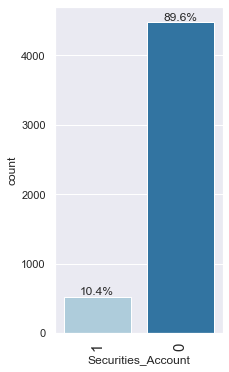

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df2, "Securities_Account", perc=True)

**Observations:**
1. Discrete binary variable.
2. 89.6% of the values are 0. Most of the customers do not have a securities account with the bank.

### CD_Account

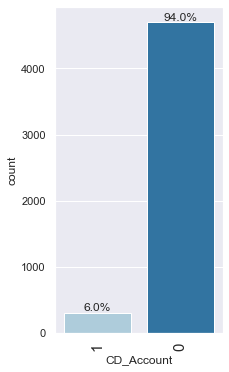

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df2, "CD_Account", perc=True)

**Observations:**
1. Discrete binary variable.
2. 94% of the values are 0. Most of the customers do not have a certificate of deposit with the bank.

### Online

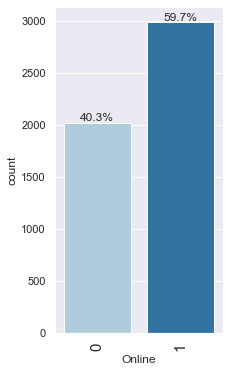

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df2, "Online", perc=True)

**Observations:**
1. Discrete binary variable.
2. About 60% of the customers use Online banking

### CreditCard

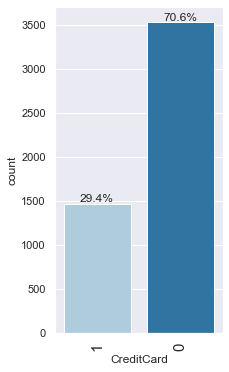

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df2, "CreditCard", perc=True)

**Observations:**
1. Discrete binary variable.
2. About 70% of the customers **do not use Credit card issued by any other bank**

### Counties_Modified

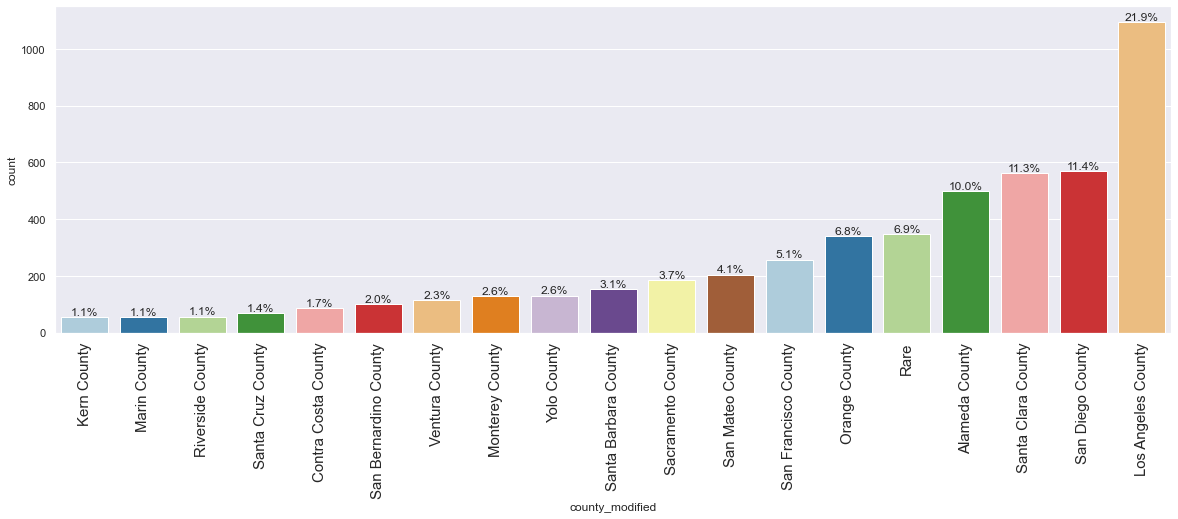

<IPython.core.display.Javascript object>

In [ ]:
df2["county_modified"] = df2["county_modified"].astype("category")
labeled_barplot(df2, "county_modified", perc=True)

## Multivariate Analysis

In [ ]:
correlation = np.round(df2.corr(), 2)  ## Correlation matrix
display(correlation)  ## complete matrix

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal_Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities_Account,-0.00,-0.00,-0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02
CD_Account,0.01,0.01,0.17,0.01,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


<IPython.core.display.Javascript object>

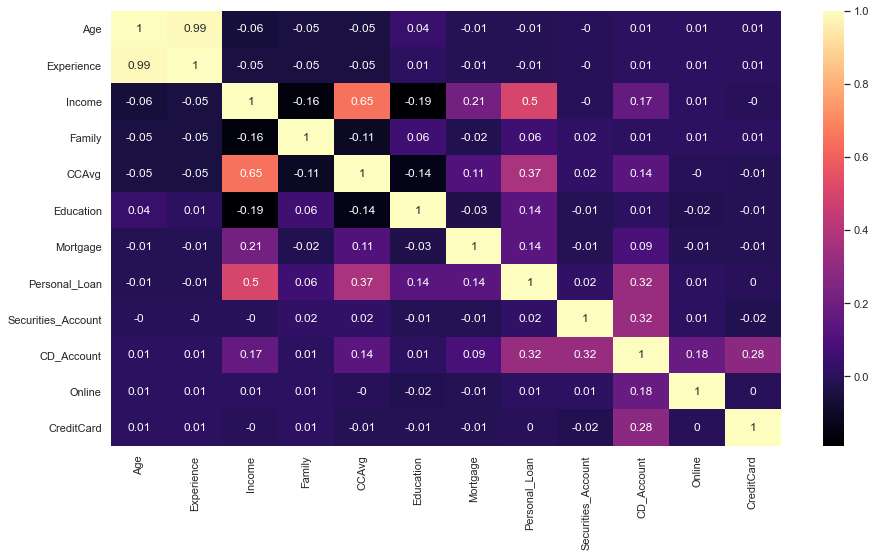

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    correlation, annot=True, cmap="magma"
)  ## correlation heat map visualization
plt.show()

**Observations:**
1. High correlation between Age and Experience, which is expected. It might be better to use just Age column as Experience column has some negative values as well.
2. Income and CCAvg are correlated. High income customers are also spend more.
3. **Personal Loan, the target variable, is correlated with Income and CCAge. It indicates that Higher income customers and customers that use credit cards more are also more likely to avail Personal Loans**

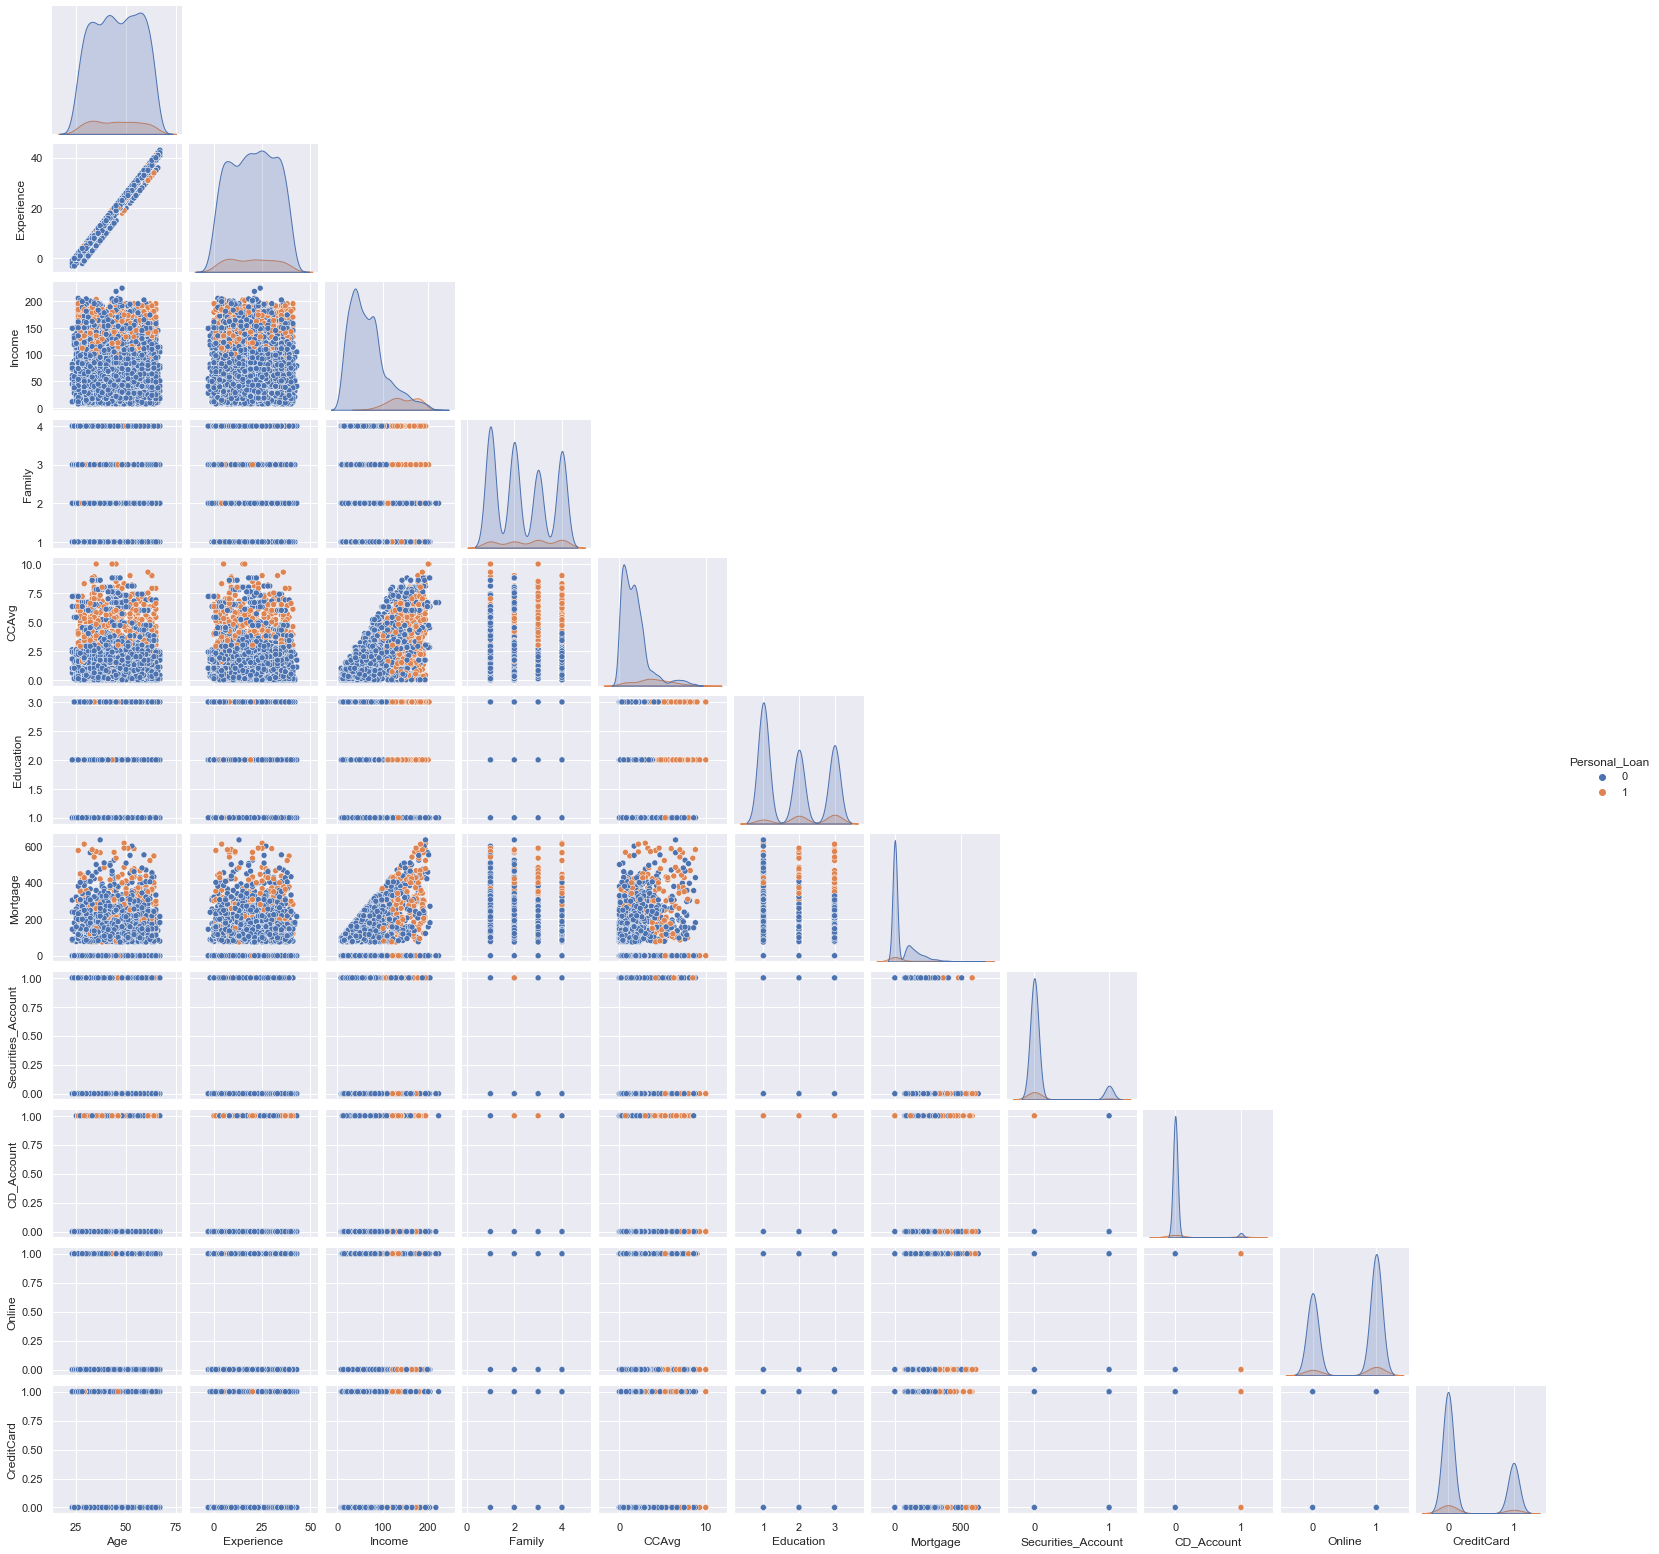

<IPython.core.display.Javascript object>

In [ ]:
sns.pairplot(data=df2, corner=True, diag_kind="kde", height=2, hue="Personal_Loan")

### Continous Numerical Fields vs Personal_Loan

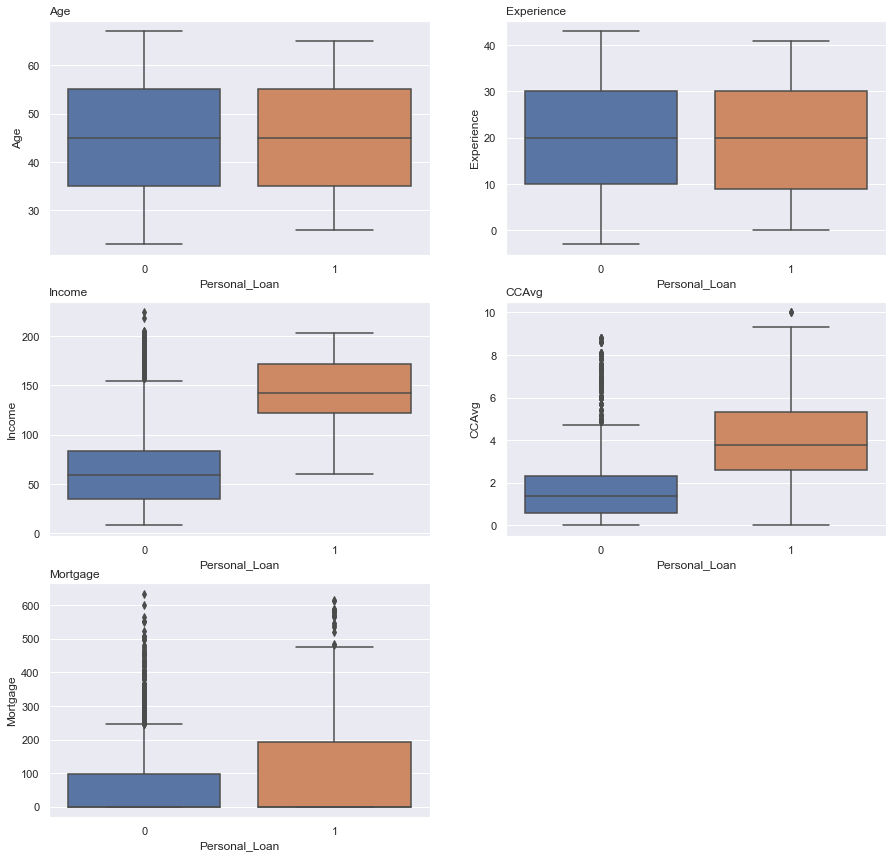

<IPython.core.display.Javascript object>

In [ ]:
numeric_columns = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
plt.figure(figsize=(15, 25))

for i, col in enumerate(numeric_columns):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=df2, x="Personal_Loan", y=df2[col])

    plt.title(col, loc="left")

Text(0.5, 1.0, 'Age')

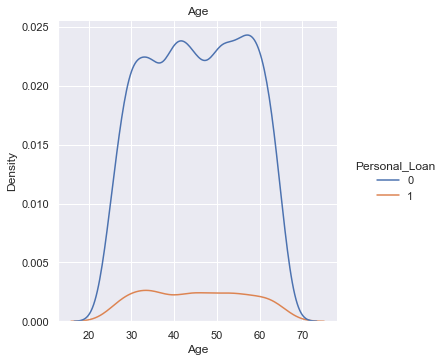

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(df2, x="Age", hue="Personal_Loan", kind="kde")
plt.title("Age")

Text(0.5, 1.0, 'Experience')

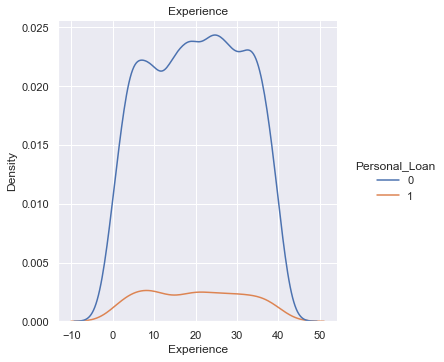

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(df2, x="Experience", hue="Personal_Loan", kind="kde")
plt.title("Experience")

Text(0.5, 1.0, 'Income')

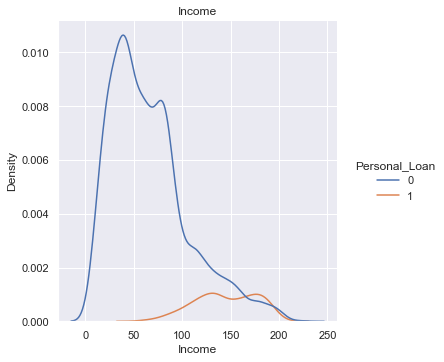

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(df2, x="Income", hue="Personal_Loan", kind="kde")
plt.title("Income")

Text(0.5, 1.0, 'CCAvg')

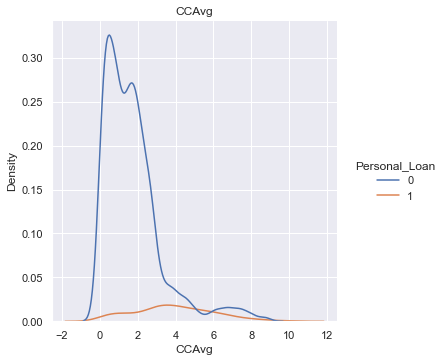

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(df2, x="CCAvg", hue="Personal_Loan", kind="kde")
plt.title("CCAvg")

Text(0.5, 1.0, 'Mortgage')

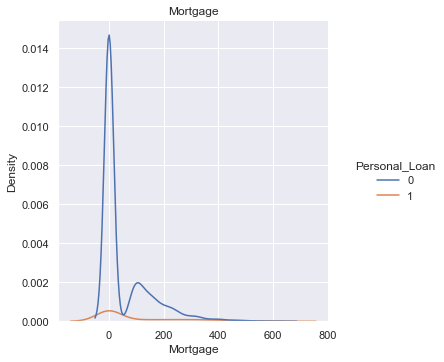

<IPython.core.display.Javascript object>

In [ ]:
sns.displot(df2, x="Mortgage", hue="Personal_Loan", kind="kde")
plt.title("Mortgage")

**Observations:**
1. Distribution of Personal _loan customers uniform across age groups.
2. Distribution of Personal _loan customers uniform across Experience.
3. **In the last campaign, customers with high income were more likely to opt for the Loan.**
4. **Also, customers with higher spending (CCAvg) were more likely to opt for the loan.**

### Discrete Variables vs Personal_Loan

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    display(tab1)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 4))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
discrete_columns = [
    "Family",
    "Education",
    "Securities_Account",
    "county_modified",
    "CD_Account",
    "CreditCard",
    "Online",
]

<IPython.core.display.Javascript object>

Family
------------------------------


Personal_Loan,0,1,All
Family,,,
All,4520,480,5000
4,1088,134,1222
3,877,133,1010
1,1365,107,1472
2,1190,106,1296


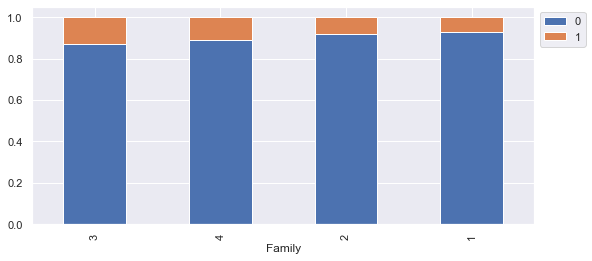

Education
------------------------------


Personal_Loan,0,1,All
Education,,,
All,4520,480,5000
3,1296,205,1501
2,1221,182,1403
1,2003,93,2096


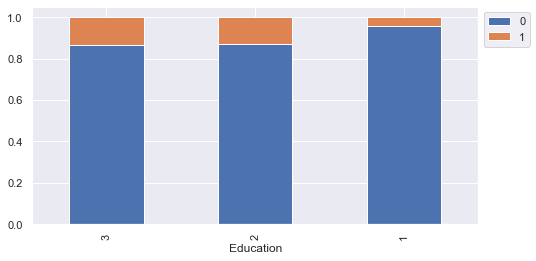

Securities_Account
------------------------------


Personal_Loan,0,1,All
Securities_Account,,,
All,4520,480,5000
0,4058,420,4478
1,462,60,522


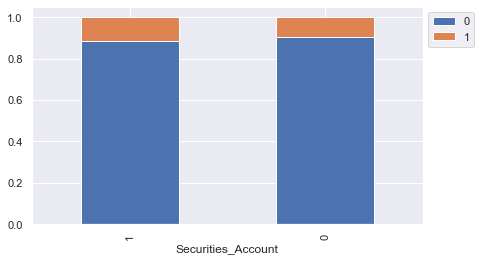

county_modified
------------------------------


Personal_Loan,0,1,All
county_modified,,,
All,4520,480,5000
Los Angeles County,984,111,1095
Santa Clara County,492,71,563
San Diego County,509,59,568
Alameda County,456,44,500
Rare,314,32,346
Orange County,309,30,339
San Francisco County,238,19,257
Monterey County,113,15,128


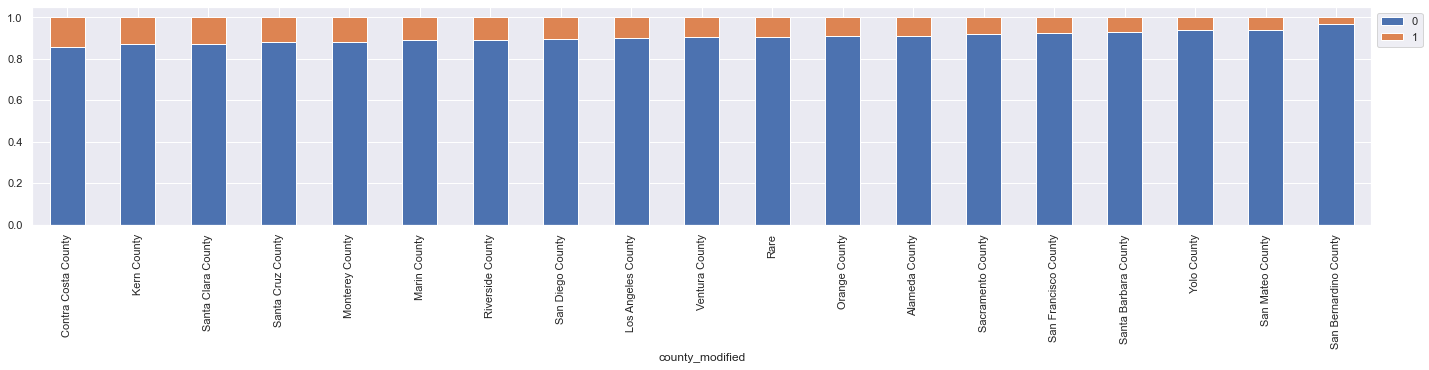

CD_Account
------------------------------


Personal_Loan,0,1,All
CD_Account,,,
All,4520,480,5000
0,4358,340,4698
1,162,140,302


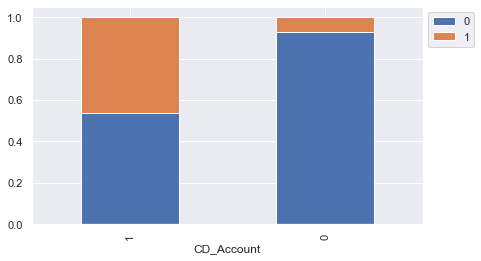

CreditCard
------------------------------


Personal_Loan,0,1,All
CreditCard,,,
All,4520,480,5000
0,3193,337,3530
1,1327,143,1470


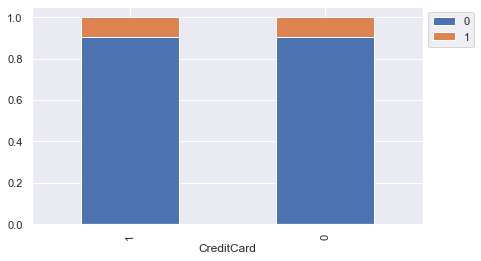

Online
------------------------------


Personal_Loan,0,1,All
Online,,,
All,4520,480,5000
1,2693,291,2984
0,1827,189,2016


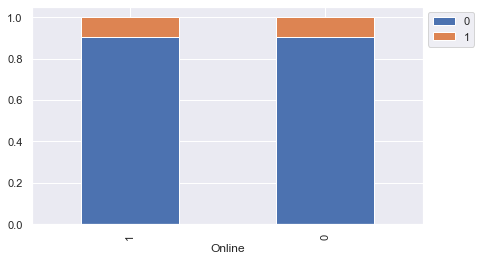

<IPython.core.display.Javascript object>

In [ ]:
for i, col in enumerate(discrete_columns):
    print(col)
    print("-" * 30)
    stacked_barplot(df2, col, "Personal_Loan")
    print("=" * 120)

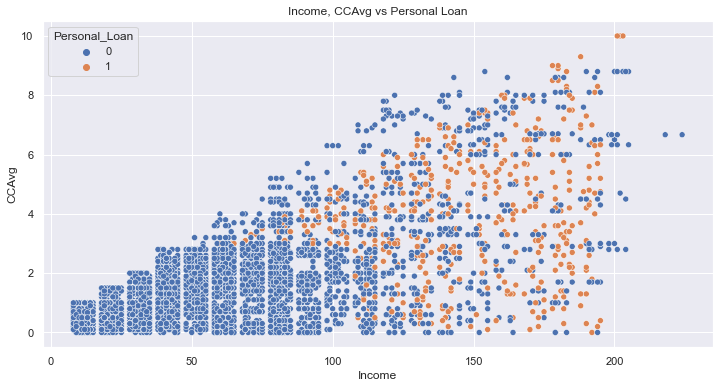

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x="Income", y="CCAvg", hue="Personal_Loan")
plt.title("Income, CCAvg vs Personal Loan")
plt.show()

In [ ]:
focus = df2[(df2["CCAvg"] < 3) & (df2["Income"] < 110)]["Personal_Loan"].value_counts()

<IPython.core.display.Javascript object>

In [ ]:
focus = pd.DataFrame(
    pd.concat(
        [
            focus,
            df2["Personal_Loan"].value_counts() - focus,
            df2["Personal_Loan"].value_counts(),
        ],
        axis=1,
    ).values,
    columns=[
        "CCAvg<3 and Income<110",
        "Others",
        "Total",
    ],
)
display(focus)

,CCAvg<3 and Income<110,Others,Total
0,3648,872,4520
1,4,476,480


<IPython.core.display.Javascript object>

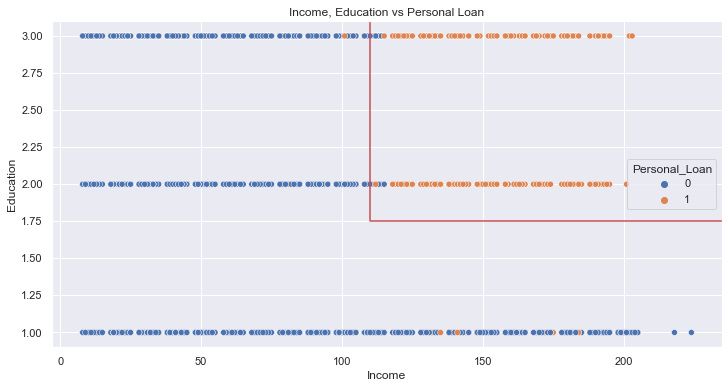

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x="Income", y="Education", hue="Personal_Loan", alpha=1)
plt.axvline(110, color="r", ymin=0.39)
plt.axhline(1.75, color="r", xmin=0.475)
plt.title("Income, Education vs Personal Loan")
plt.show()

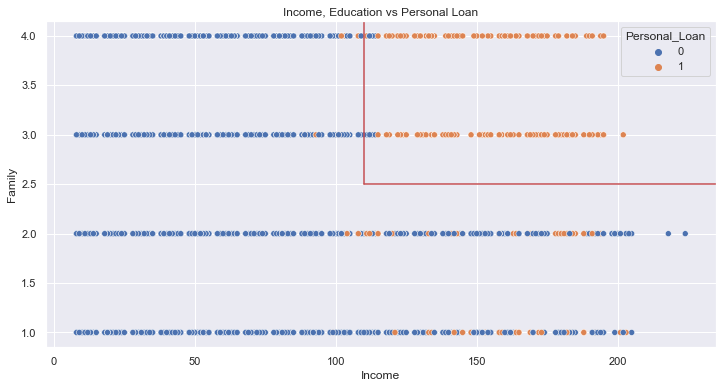

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x="Income", y="Family", hue="Personal_Loan", alpha=1)
plt.axvline(110, color="r", ymin=0.5)
plt.axhline(2.5, color="r", xmin=0.475)
plt.title("Income, Education vs Personal Loan")
plt.show()

**Observations:** <a name ='EDAobs'></a>

1. **Education level 2 and 3 customers with Income > 110K are almost guaranteed to opt for the loan!**

2. Customers with **3 and 4 membered families and with income > 110K are also almost guaranteed to opt for the loan.**

3. Customers with **CCAvg < 3 AND Income < 110** are almost guaranteed to **not opt for the loan**. It would be much better to focus on the 'other' group of customers for the next campaign.

4. Customers with **CD_Account** were much more likely to opt for the Loan.

5. **More educated customers** were much more likely to opt for the loan.

6. **Single people were least likely to opt for the loan. 3-4 membered families were more likely to opt for the loan**


### Personal Loan

In [ ]:
df2.Personal_Loan.value_counts(normalize=True) * 100

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
1. **There is class imbalance. The positive class (customers who opted for the loan are only 10% of the complete sample)**

## Modelling

In addition to hyper-parameter tuning, I will use Pipelines to automate the process of determining the right data pre-processing steps.

The options to evaluate are:
1. One hot encoding of Family OR directly using the numerical value
2. One hot encoding of Education OR directly using the numerical value
</br></br>


3. Outlier clipping of CCAvg or no treatment
4. Outlier clipping of Income or no treatment
5. Using Mortgage field as it is or converting it to binary 0 (Mortgage = 0) or 1 (Mortgage>0).

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  county_modified     5000 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 474.4 KB


<IPython.core.display.Javascript object>

#### Dropping the Experience column because of high correlation with Age

In [ ]:
df2 = df2.drop("Experience", axis=1)

<IPython.core.display.Javascript object>

### Writing custom encoder class

Fine tune encoding method (OHE/None) with Grid Search.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##---- Encoding based on the encode_type parameter----##
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encode_type=None, col=None):
        self.encode_type = encode_type
        self.ohe_encoder = OneHotEncoder(handle_unknown="error", drop="first")
        self.col = col

    def fit(self, X, y=None):
        if self.encode_type is None:
            return self
        if self.encode_type == "ohe":
            self.ohe_encoder.fit(X[[self.col]], y)
        return self

    def transform(self, X, y=None):
        if self.encode_type is None:
            return X
        if self.encode_type == "ohe":
            encoded = pd.DataFrame(self.ohe_encoder.transform(X[[self.col]]).toarray())
            encoded.columns = self.ohe_encoder.get_feature_names()
            encoded.index = X.index
            return encoded

    def get_feature_names(self):
        if self.encode_type == "ohe":
            return self.ohe_encoder.get_feature_names()
        return [self.col]

##### Writing custom transformer class to try out different approaches for outlier handling

In [ ]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, income=None, CCAvg=None, mortgage=None):
        self.income = income
        self.CCAvg = CCAvg
        self.mortgage = mortgage

    def fit(self, X, y=None):
        ##---- Learning the parameters income_cutoff and CCAvg_cutoff ##
        if self.income is not None:
            self.income_cutoff = self.get_cutoff(X["Income"], self.income)
        if self.CCAvg is not None:
            self.CCAvg_cutoff = self.get_cutoff(X["CCAvg"], self.CCAvg)

        return self

    def transform(self, X, y=None):
        ##-----  Applying the learned parameters ##
        if self.mortgage:
            X["Mortgage"] = X["Mortgage"].apply(lambda x: 1 if x > 0 else 0)
        if self.income is not None:
            X["Income"] = X["Income"].apply(
                lambda x: self.income_cutoff if x > self.income_cutoff else x
            )
        if self.CCAvg is not None:
            X["CCAvg"] = X["CCAvg"].apply(
                lambda x: self.CCAvg_cutoff if x > self.CCAvg_cutoff else x
            )
        return X

    def get_feature_names(self):
        ##----- return column names ##
        return ["Income", "CCAvg", "Mortgage"]

    def get_cutoff(self, x, multiplier):
        Q1, Q2, Q3 = np.quantile(x, [0.25, 0.5, 0.75])
        return Q3 + (Q3 - Q1) * multiplier

<IPython.core.display.Javascript object>

In [ ]:
from sklearn import set_config

set_config(display="diagram")

<IPython.core.display.Javascript object>

In [ ]:
county_encoder = CustomEncoder(col="county_modified")
education_encoder = CustomEncoder(col="Education")
family_encoder = CustomEncoder(col="Family")
income_ccavg_mortgage_transform = CustomTransformer()

encoder = ColumnTransformer(
    transformers=[
        ("county", county_encoder, ["county_modified"]),
        ("education", education_encoder, ["Education"]),
        ("family", family_encoder, ["Family"]),
        (
            "income_ccavg_mortgage",
            income_ccavg_mortgage_transform,
            ["Income", "CCAvg", "Mortgage"],
        ),
    ],
    remainder="passthrough",
)
encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('county', CustomEncoder(col='county_modified'),
                                 ['county_modified']),
                                ('education', CustomEncoder(col='Education'),
                                 ['Education']),
                                ('family', CustomEncoder(col='Family'),
                                 ['Family']),
                                ('income_ccavg_mortgage', CustomTransformer(),
                                 ['Income', 'CCAvg', 'Mortgage'])])

<IPython.core.display.Javascript object>

### Splitting the dataset into train and test sets

In [ ]:
X = df2.drop(["Personal_Loan"], axis=1)
Y = df2["Personal_Loan"]


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

## Logistic Regression

### Setting up the pipeline for Grid search

I will use Grid Search to find the best combination of parameters for:
1. Data-preprocessing/encoding
2. Logistic regression model (C, class_weight, etc)

**WORK-FLOW:**
1. Grid Search to figure out the appropriate parameters
   - optimize threshold
        
        
2. SFS to narrow down the features
   - optimize threshold

In [ ]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp

cachedir = mkdtemp()
model_pipeline_gs = Pipeline(
    steps=[
        ("encoding", encoder),
        ("log_reg", LogisticRegression(random_state=1)),
    ],
    memory=cachedir,
)
model_pipeline_gs

Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmptb58k4f0',
         steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('log_reg', LogisticRegression(random_state=1))])

<IPython.core.display.Javascript object>

### Specifying the parameters for Grid Search with the pipeline

In [ ]:
param_grid = {
    "encoding__county__encode_type": ["ohe"],
    "encoding__education__encode_type": ["ohe", None],
    "encoding__family__encode_type": ["ohe", None],
    "encoding__income_ccavg_mortgage__income": [1.5, None],
    "encoding__income_ccavg_mortgage__CCAvg": [1.5, 3, None],
    "encoding__income_ccavg_mortgage__mortgage": [True, False],
    "log_reg__class_weight": [
        "balanced",
        {0: 0.05, 1: 0.95},
        None,
    ],
    "log_reg__C": [0.75, 0.8, 0.85, 0.9, 1],
}

scoring = {
    "AUC": "roc_auc",
}

grid_search = GridSearchCV(
    model_pipeline_gs,
    param_grid,
    cv=3,
    scoring=scoring,
    refit="AUC",
    return_train_score=True,
)

<IPython.core.display.Javascript object>

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmptb58k4f0',
                                steps=[('encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('county',
                                                                         CustomEncoder(col='county_modified'),
                                                                         ['county_modified']),
                                                                        ('education',
                                                                         CustomEncoder(col='Education'),
                                                                         ['Education']),
                                                                        ('family',
                                                                         CustomEncoder(col='Family'),
                                                                         ['Family']),...
                         'encoding__family__encode_type': ['ohe', None],
                         'encoding__income_ccavg_mortgage__CCAvg': [1.5, 3,
                                                                    None],
                         'encoding__income_ccavg_mortgage__income': [1.5, None],
                         'encoding__income_ccavg_mortgage__mortgage': [True,
                                                                       False],
                         'log_reg__C': [0.75, 0.8, 0.85, 0.9, 1],
                         'log_reg__class_weight': ['balanced',
                                                   {0: 0.05, 1: 0.95}, None]},
             refit='AUC', return_train_score=True, scoring={'AUC': 'roc_auc'})

<IPython.core.display.Javascript object>

In [ ]:
model_pipeline_gs = grid_search.best_estimator_
model_pipeline_gs

Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmptb58k4f0',
         steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('log_reg', LogisticRegression(C=0.8, random_state=1))])

<IPython.core.display.Javascript object>

**Observations:**

The grid search suggests:
- **For data-preprocessing**
     * OHE for county_modified, Education, and Family
     * Clipping the outliers at Q3+1.5*(IQR) for CCAvg and income
     * Converting Mortgage to just Binary category

- **For logistic regression**
     * C=0.8
     * class weight = None

In [ ]:
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 3))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="YlGnBu",
        cbar=False,
        linewidths=0.5,
        annot_kws={"size": 12},
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


def show_result(model, predictors, target, threshold=0.5):
    confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold)
    display(
        model_performance_classification_sklearn_with_threshold(
            model, predictors, target, threshold
        )
    )


<IPython.core.display.Javascript object>

In [ ]:
def plot_roc_auc(model, X, y):
    logit_roc_auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds


def plot_prec_recall_vs_tresh(model, X, y):
    y_scores = model.predict_proba(X)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(
        y,
        y_scores,
    )

    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

<IPython.core.display.Javascript object>

#### Refitting the suggested model

In [ ]:
model_pipeline_gs.fit(X_train, y_train)

Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmptb58k4f0',
         steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('log_reg', LogisticRegression(C=0.8, random_state=1))])

<IPython.core.display.Javascript object>

### Model Evaluation

In the classification problem at hand, we want to maximize the identification of potential Loan customers for the bank. In other words, False Negatives are costly to us.<br>
Therefore, while selecting and evaluating the models, need to look for high recall (and good enough precision). ** will be looking for around 90% Recall and F1 score of around 60%.

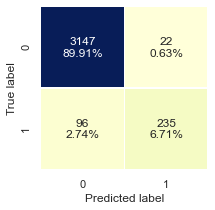

,Accuracy,Recall,Precision,F1
0,0.966286,0.70997,0.914397,0.79932


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_gs, X_train, y_train)

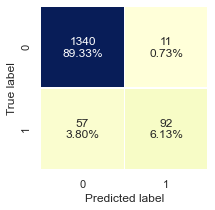

,Accuracy,Recall,Precision,F1
0,0.954667,0.61745,0.893204,0.730159


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_gs, X_test, y_test)

### Roc-Auc optimal threshold

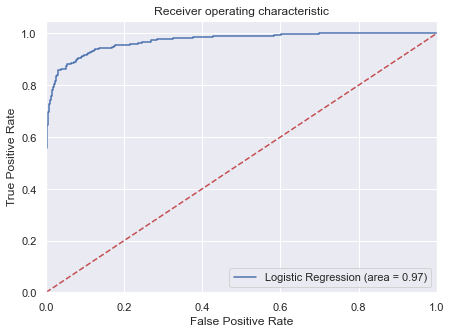

<IPython.core.display.Javascript object>

In [ ]:
fpr, tpr, thresholds = plot_roc_auc(model_pipeline_gs, X_train, y_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc_gs = thresholds[optimal_idx]
print(optimal_threshold_auc_roc_gs)

0.16926968838114287


<IPython.core.display.Javascript object>

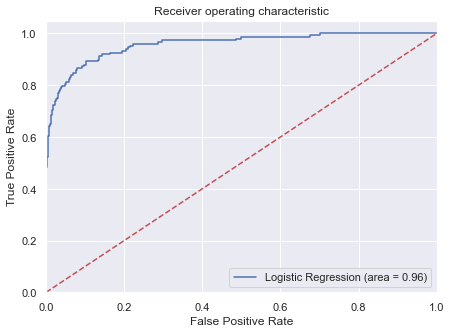

<IPython.core.display.Javascript object>

In [ ]:
fpr, tpr, thresholds = plot_roc_auc(model_pipeline_gs, X_test, y_test)

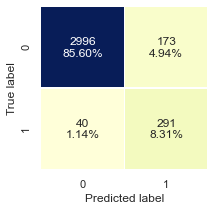

,Accuracy,Recall,Precision,F1
0,0.939143,0.879154,0.627155,0.732075


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_gs, X_train, y_train, optimal_threshold_auc_roc_gs)

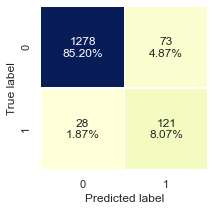

,Accuracy,Recall,Precision,F1
0,0.932667,0.812081,0.623711,0.705539


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_gs, X_test, y_test, optimal_threshold_auc_roc_gs)

### Precision-Recall curve

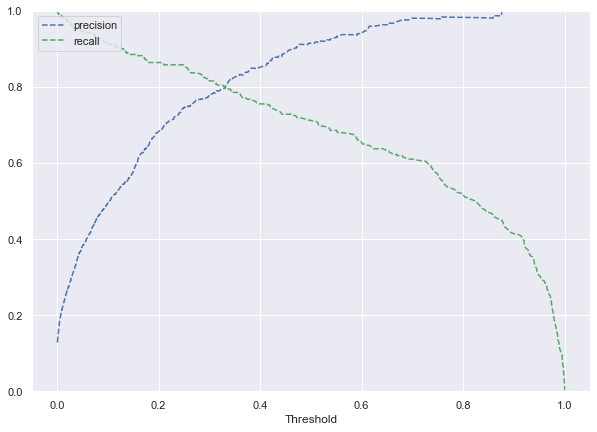

<IPython.core.display.Javascript object>

In [ ]:
plot_prec_recall_vs_tresh(model_pipeline_gs, X_train, y_train)

Train set performance :  0.06


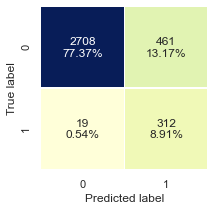

,Accuracy,Recall,Precision,F1
0,0.862857,0.942598,0.403622,0.565217


Test set performance :  0.06


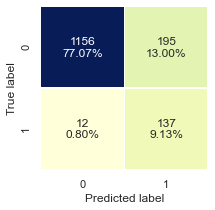

,Accuracy,Recall,Precision,F1
0,0.862,0.919463,0.412651,0.569647


Train set performance :  0.065


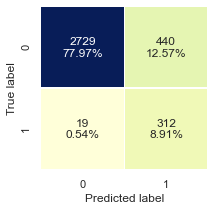

,Accuracy,Recall,Precision,F1
0,0.868857,0.942598,0.414894,0.576177


Test set performance :  0.065


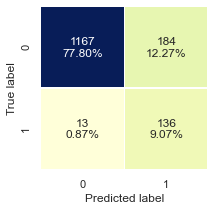

,Accuracy,Recall,Precision,F1
0,0.868667,0.912752,0.425,0.579957


Train set performance :  0.07


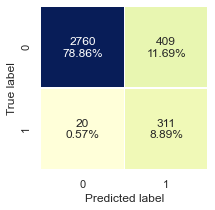

,Accuracy,Recall,Precision,F1
0,0.877429,0.939577,0.431944,0.591817


Test set performance :  0.07


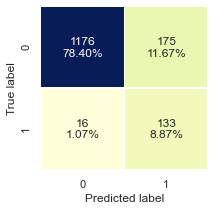

,Accuracy,Recall,Precision,F1
0,0.872667,0.892617,0.431818,0.582057


Train set performance :  0.075


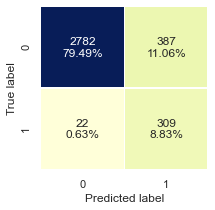

,Accuracy,Recall,Precision,F1
0,0.883143,0.933535,0.443966,0.601753


Test set performance :  0.075


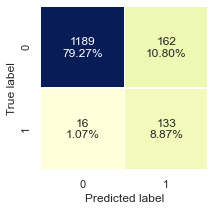

,Accuracy,Recall,Precision,F1
0,0.881333,0.892617,0.450847,0.599099


<IPython.core.display.Javascript object>

In [ ]:
optimal_threshold_curve_options = [0.06, 0.065, 0.07, 0.075]
for th in optimal_threshold_curve_options:
    print("Train set performance : ", th)
    show_result(model_pipeline_gs, X_train, y_train, threshold=th)
    print("Test set performance : ", th)
    show_result(model_pipeline_gs, X_test, y_test, threshold=th)
    print("============================================")
    print("============================================")

Train set performance :  0.065  threshold


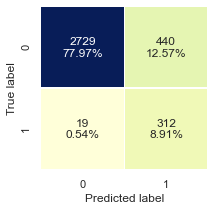

,Accuracy,Recall,Precision,F1
0,0.868857,0.942598,0.414894,0.576177


Test set performance :  0.065  threshold


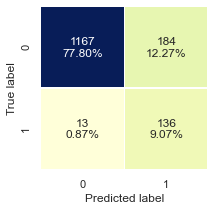

,Accuracy,Recall,Precision,F1
0,0.868667,0.912752,0.425,0.579957


<IPython.core.display.Javascript object>

In [ ]:
###--- selecting optimal threshold out of the options ---###
optimal_threshold_curve_gs = 0.065

print("Train set performance : ", optimal_threshold_curve_gs, " threshold")
show_result(model_pipeline_gs, X_train, y_train, threshold=optimal_threshold_curve_gs)
print("Test set performance : ", optimal_threshold_curve_gs, " threshold")
show_result(model_pipeline_gs, X_test, y_test, threshold=optimal_threshold_curve_gs)

### SFS 1

Run SFS on top of the pipeline (column transformation parameters and logistic regression parameters) suggested by grid search.

In [ ]:
from sklearn.base import clone
###----cloning the encoding and preprocessing suggested by GS----###
###----cloning is required if we want to preserve the originally learned pipeline
###----Normal assignment will lead to loss of the previous/original model when we retrain the new one ####
encoding_final = clone(model_pipeline_gs["encoding"])
encoding_final

ColumnTransformer(remainder='passthrough',
                  transformers=[('county',
                                 CustomEncoder(col='county_modified',
                                               encode_type='ohe'),
                                 ['county_modified']),
                                ('education',
                                 CustomEncoder(col='Education',
                                               encode_type='ohe'),
                                 ['Education']),
                                ('family',
                                 CustomEncoder(col='Family', encode_type='ohe'),
                                 ['Family']),
                                ('income_ccavg_mortgage',
                                 CustomTransformer(CCAvg=1.5, income=1.5,
                                                   mortgage=True),
                                 ['Income', 'CCAvg', 'Mortgage'])])

<IPython.core.display.Javascript object>

In [ ]:
###---- cloning the log reg suggested by GS----###
log_reg_final = clone(model_pipeline_gs["log_reg"])
log_reg_final

LogisticRegression(C=0.8, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
len(model_pipeline_gs["encoding"].get_feature_names())

31

<IPython.core.display.Javascript object>

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(
    estimator=log_reg_final,
    k_features=31,
    forward=True,
    floating=False,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [ ]:
###---- New pipeline for SFS1----###
model_pipeline_sfs1 = Pipeline(
    steps=[
        ("encoding", encoding_final),
        ("sfs", sfs1),
    ]
)

<IPython.core.display.Javascript object>

In [ ]:
model_pipeline_sfs1.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('sfs',
                 SequentialFeatureSelector(cv=3,
                                           estimator=LogisticRegression(C=0.8,
                                                                        random_state=1),
                                           k_features=31, n_jobs=-1,
                                           scoring='roc_auc'))])

<IPython.core.display.Javascript object>

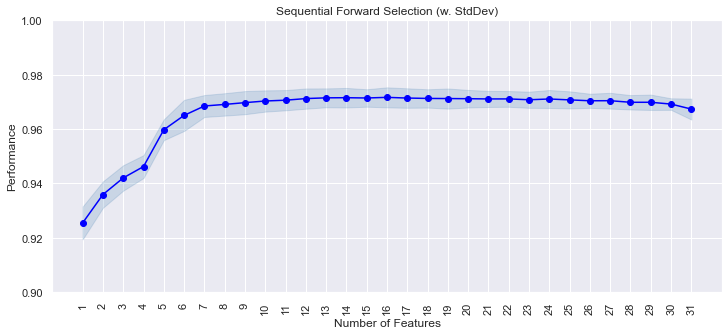

<IPython.core.display.Javascript object>

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(
    model_pipeline_sfs1["sfs"].get_metric_dict(), kind="std_dev", figsize=(12, 5)
)
plt.ylim([0.9, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

12 features seems to be a good number for the model.

### SFS 2

In [ ]:
sfs2 = SFS(
    estimator=log_reg_final,
    k_features=12,
    forward=True,
    floating=False,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [ ]:
###---- New pipeline for SFS2----###
model_pipeline_sfs2 = Pipeline(
    steps=[
        ("encoding", encoding_final),
        ("sfs", sfs2),
    ]
)

<IPython.core.display.Javascript object>

In [ ]:
model_pipeline_sfs2.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('sfs',
                 SequentialFeatureSelector(cv=3,
                                           estimator=LogisticRegression(C=0.8,
                                                                        random_state=1),
                                           k_features=12, n_jobs=-1,
                                           scoring='roc_auc'))])

<IPython.core.display.Javascript object>

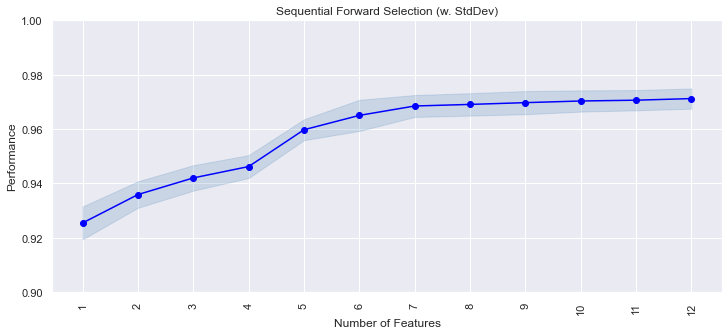

<IPython.core.display.Javascript object>

In [ ]:
fig1 = plot_sfs(
    model_pipeline_sfs2["sfs"].get_metric_dict(), kind="std_dev", figsize=(12, 5)
)
plt.ylim([0.9, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
feat_cols = list(model_pipeline_sfs2["sfs"].k_feature_idx_)
print(feat_cols)

[12, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30]


<IPython.core.display.Javascript object>

In [ ]:
feat_names = np.array(model_pipeline_sfs2["encoding"].get_feature_names())[feat_cols]
list(feat_names)

['county__x0_San Mateo County',
 'education__x0_2',
 'education__x0_3',
 'family__x0_2',
 'family__x0_3',
 'family__x0_4',
 'income_ccavg_mortgage__Income',
 'income_ccavg_mortgage__CCAvg',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

<IPython.core.display.Javascript object>

#### Adding another layer to the final pipeline to extract the required columns and filter out the rest

In [ ]:
feature_selector = ColumnTransformer(
    transformers=[("features", "passthrough", feat_cols)], ### keeping these columns
    remainder="drop", ### droppping the rest
)

<IPython.core.display.Javascript object>

In [ ]:
model_pipeline_final = Pipeline(
    steps=[
        ("encoding", encoding_final),
        ("feature_selection", feature_selector), ### filtering columns
        ("log_reg", log_reg_final),
    ]
)

<IPython.core.display.Javascript object>

In [ ]:
model_pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('feature_selection',
                 ColumnTransformer(transformers=[('features', 'passthrough',
                                                  [12, 18, 19, 20, 21, 22, 23,
                                                   24, 27, 28, 29, 30])])),
                ('log_reg', LogisticRegression(C=0.8, random_state=1))])

<IPython.core.display.Javascript object>

### Coefficients

In [ ]:
coef_df = pd.DataFrame(
    np.append(
        model_pipeline_final["log_reg"].coef_,
        model_pipeline_final["log_reg"].intercept_,
    ),
    index=np.append(
        np.array(model_pipeline_final["encoding"].get_feature_names())[feat_cols],
        np.array(["Intercept"]),
    ),
    columns=["Coefficients"],
)
coef_df

,Coefficients
county__x0_San Mateo County,-1.024765
education__x0_2,3.314626
education__x0_3,3.520813
family__x0_2,-0.102224
family__x0_3,2.309543
family__x0_4,1.540824
income_ccavg_mortgage__Income,0.059175
income_ccavg_mortgage__CCAvg,0.444882
Securities_Account,-0.776192
CD_Account,2.866433


<IPython.core.display.Javascript object>

### Odds

In [ ]:
odds = np.exp(model_pipeline_final["log_reg"].coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(model_pipeline_final["log_reg"].coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change_odd%": perc_change_odds},
    index=np.array(model_pipeline_final["encoding"].get_feature_names())[feat_cols],
)

,Odds,Change_odd%
county__x0_San Mateo County,0.358881,-64.111925
education__x0_2,27.512096,2651.209554
education__x0_3,33.811914,3281.191395
family__x0_2,0.902827,-9.717290
family__x0_3,10.069825,906.982477
family__x0_4,4.668435,366.843494
income_ccavg_mortgage__Income,1.060961,6.096139
income_ccavg_mortgage__CCAvg,1.560306,56.030642
Securities_Account,0.460155,-53.984523
CD_Account,17.574213,1657.421330


<IPython.core.display.Javascript object>

**Obsrvations**

As we found out in the <a href= "#EDAobs">**EDA**</a>, the logistic regression model also suggests that:
1. Customers with **Education levels 2 and 3 are much more likely** to opt for the loan.
2. Customers with **3 and 4 family members are also much more likely** to opt for the loan.
3. Having a **CD Account (CD_Account = 1) also increases the odds** of opting for the loan a lot (by 1657%)
4. **Higher Income and higher spending (CCAvg) also increase the odds** of opting for the loan.

Other observations from the model:
1. Customers from **San Mateo County** are **less likely** to opt for the loan.
2. Having a **credit card with other banks (CreditCard = 1) also makes a customer less likely** to opt for the loan.
3. **Having a securities account and using online banking make it less likely** that the customer would opt for the loan.

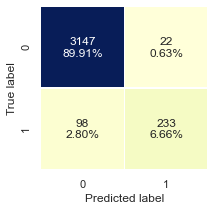

,Accuracy,Recall,Precision,F1
0,0.965714,0.703927,0.913725,0.795222


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_final, X_train, y_train)

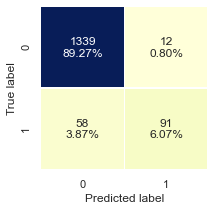

,Accuracy,Recall,Precision,F1
0,0.953333,0.610738,0.883495,0.722222


<IPython.core.display.Javascript object>

In [ ]:
show_result(model_pipeline_final, X_test, y_test)

#### Optimizing threshold

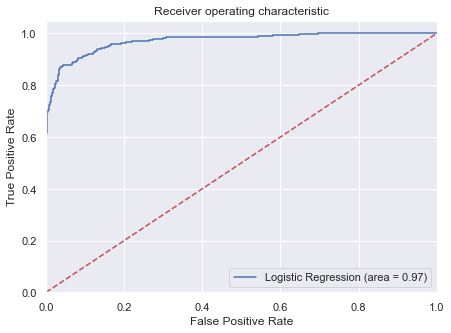

<IPython.core.display.Javascript object>

In [ ]:
tpr, fpr, thresholds = plot_roc_auc(model_pipeline_final, X_train, y_train)

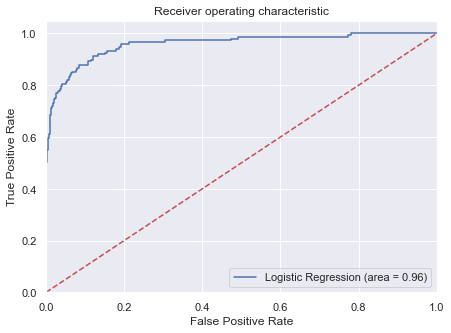

<IPython.core.display.Javascript object>

In [ ]:
tpr, fpr, thresholds = plot_roc_auc(model_pipeline_final, X_test, y_test)

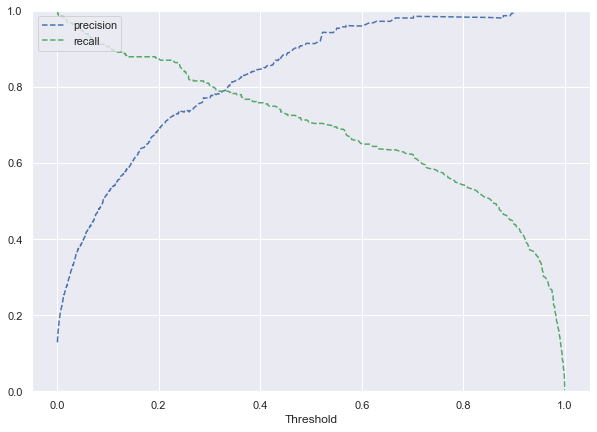

<IPython.core.display.Javascript object>

In [ ]:
plot_prec_recall_vs_tresh(model_pipeline_final, X_train, y_train)

Train set performance :  0.065  threshold


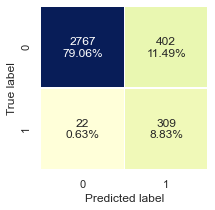

,Accuracy,Recall,Precision,F1
0,0.878857,0.933535,0.434599,0.59309


Test set performance :  0.065  threshold


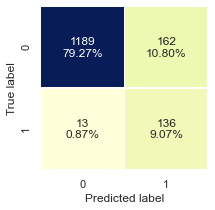

,Accuracy,Recall,Precision,F1
0,0.883333,0.912752,0.456376,0.608501


<IPython.core.display.Javascript object>

In [ ]:
optimal_threshold_curve_sfs = 0.065

print("Train set performance : ", optimal_threshold_curve_sfs, " threshold")
show_result(
    model_pipeline_final, X_train, y_train, threshold=optimal_threshold_curve_sfs
)
print("Test set performance : ", optimal_threshold_curve_sfs, " threshold")
show_result(model_pipeline_final, X_test, y_test, threshold=optimal_threshold_curve_sfs)

In [ ]:
log_reg_models_train_comp_df = pd.concat(
    [
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_train, y_train
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_train, y_train, optimal_threshold_auc_roc_gs
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_train, y_train, optimal_threshold_curve_gs
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_final, X_train, y_train, optimal_threshold_curve_sfs
        ).T,
    ],
    axis=1,
)
log_reg_models_train_comp_df.columns = [
    "Logistic Reg. Grid Search",
    "Logistic Reg. GS: 0.0169 threshold",
    "Logistic Reg. GS: 0.065 threshold",
    "Logistic Reg. SFS: 0.065 threshold",
]


log_reg_models_test_comp_df = pd.concat(
    [
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_test, y_test
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_test, y_test, optimal_threshold_auc_roc_gs
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_gs, X_test, y_test, optimal_threshold_curve_gs
        ).T,
        model_performance_classification_sklearn_with_threshold(
            model_pipeline_final, X_test, y_test, optimal_threshold_curve_sfs
        ).T,
    ],
    axis=1,
)
log_reg_models_test_comp_df.columns = [
    "Logistic Reg. Grid Search",
    "Logistic Reg. GS: 0.0169 threshold",
    "Logistic Reg. GS: 0.065 threshold",
    "Logistic Reg. SFS: 0.065 threshold",
]
print("Training performance comparison:")
print("-" * 35)
display(log_reg_models_train_comp_df)

print("Test performance comparison:")
print("-" * 35)
display(log_reg_models_test_comp_df)

Training performance comparison:
-----------------------------------


,Logistic Reg. Grid Search,Logistic Reg. GS: 0.0169 threshold,Logistic Reg. GS: 0.065 threshold,Logistic Reg. SFS: 0.065 threshold
Accuracy,0.966286,0.939143,0.868857,0.878857
Recall,0.709970,0.879154,0.942598,0.933535
Precision,0.914397,0.627155,0.414894,0.434599
F1,0.799320,0.732075,0.576177,0.593090


Test performance comparison:
-----------------------------------


,Logistic Reg. Grid Search,Logistic Reg. GS: 0.0169 threshold,Logistic Reg. GS: 0.065 threshold,Logistic Reg. SFS: 0.065 threshold
Accuracy,0.954667,0.932667,0.868667,0.883333
Recall,0.617450,0.812081,0.912752,0.912752
Precision,0.893204,0.623711,0.425000,0.456376
F1,0.730159,0.705539,0.579957,0.608501


<IPython.core.display.Javascript object>

**The 4th model gives a good recall and with a good enough precision. But, can change the thresholds to tune the recall and precision values

## Decision Tree

In [ ]:
def show_tree(model, feature_names, figsize=(15, 10)):
    plt.figure(figsize=figsize)
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()


def show_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()


def show_tree_performance(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 3))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="YlGnBu",
        cbar=False,
        linewidths=0.5,
        annot_kws={"size": 12},
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    #     df_perf = pd.DataFrame(
    #         {
    #             "Accuracy": accuracy_score(target, model.predict(predictors)),
    #             "Recall": recall_score(target, model.predict(predictors)),
    #             "Precision": precision_score(target, model.predict(predictors)),
    #             "F1": f1_score(target, model.predict(predictors)),
    #         },
    #         index=[0],
    #     )
    display(get_tree_metrics(model, predictors, target).T)


def get_tree_metrics(model, predictors, target):
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy_score(target, model.predict(predictors)),
            "Recall": recall_score(target, model.predict(predictors)),
            "Precision": precision_score(target, model.predict(predictors)),
            "F1": f1_score(target, model.predict(predictors)),
        },
        index=[0],
    )
    return df_perf.T

<IPython.core.display.Javascript object>

### Setting up a new pipeline for decision tree model
As the base line, start with the encoding/preprocessing parameters suggested by the logistic regression grid search in the previous section.

In [ ]:
tree_encoding = clone(model_pipeline_gs["encoding"])

<IPython.core.display.Javascript object>

In [ ]:
cachedir = mkdtemp()
tree_model_pipeline = Pipeline(
    steps=[
        ("encoding", tree_encoding),
        (
            "tree",
            DecisionTreeClassifier(
                criterion="gini", class_weight="balanced", random_state=1
            ),
        ),
    ],
    memory=cachedir,
)

<IPython.core.display.Javascript object>

In [ ]:
tree_model_pipeline.fit(X_train, y_train)

Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmpn41b1q95',
         steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=1))])

<IPython.core.display.Javascript object>

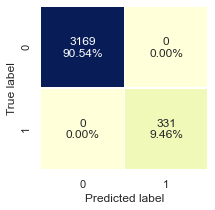

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline, X_train, y_train)

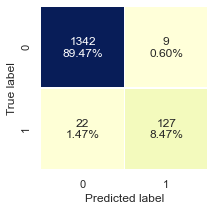

,Accuracy,Recall,Precision,F1
0,0.979333,0.852349,0.933824,0.891228


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline, X_test, y_test)

In [ ]:
tree_train_results = get_tree_metrics(tree_model_pipeline, X_train, y_train)
tree_test_results = get_tree_metrics(tree_model_pipeline, X_test, y_test)

<IPython.core.display.Javascript object>

In [ ]:
feature_names = tree_model_pipeline["encoding"].get_feature_names()

<IPython.core.display.Javascript object>

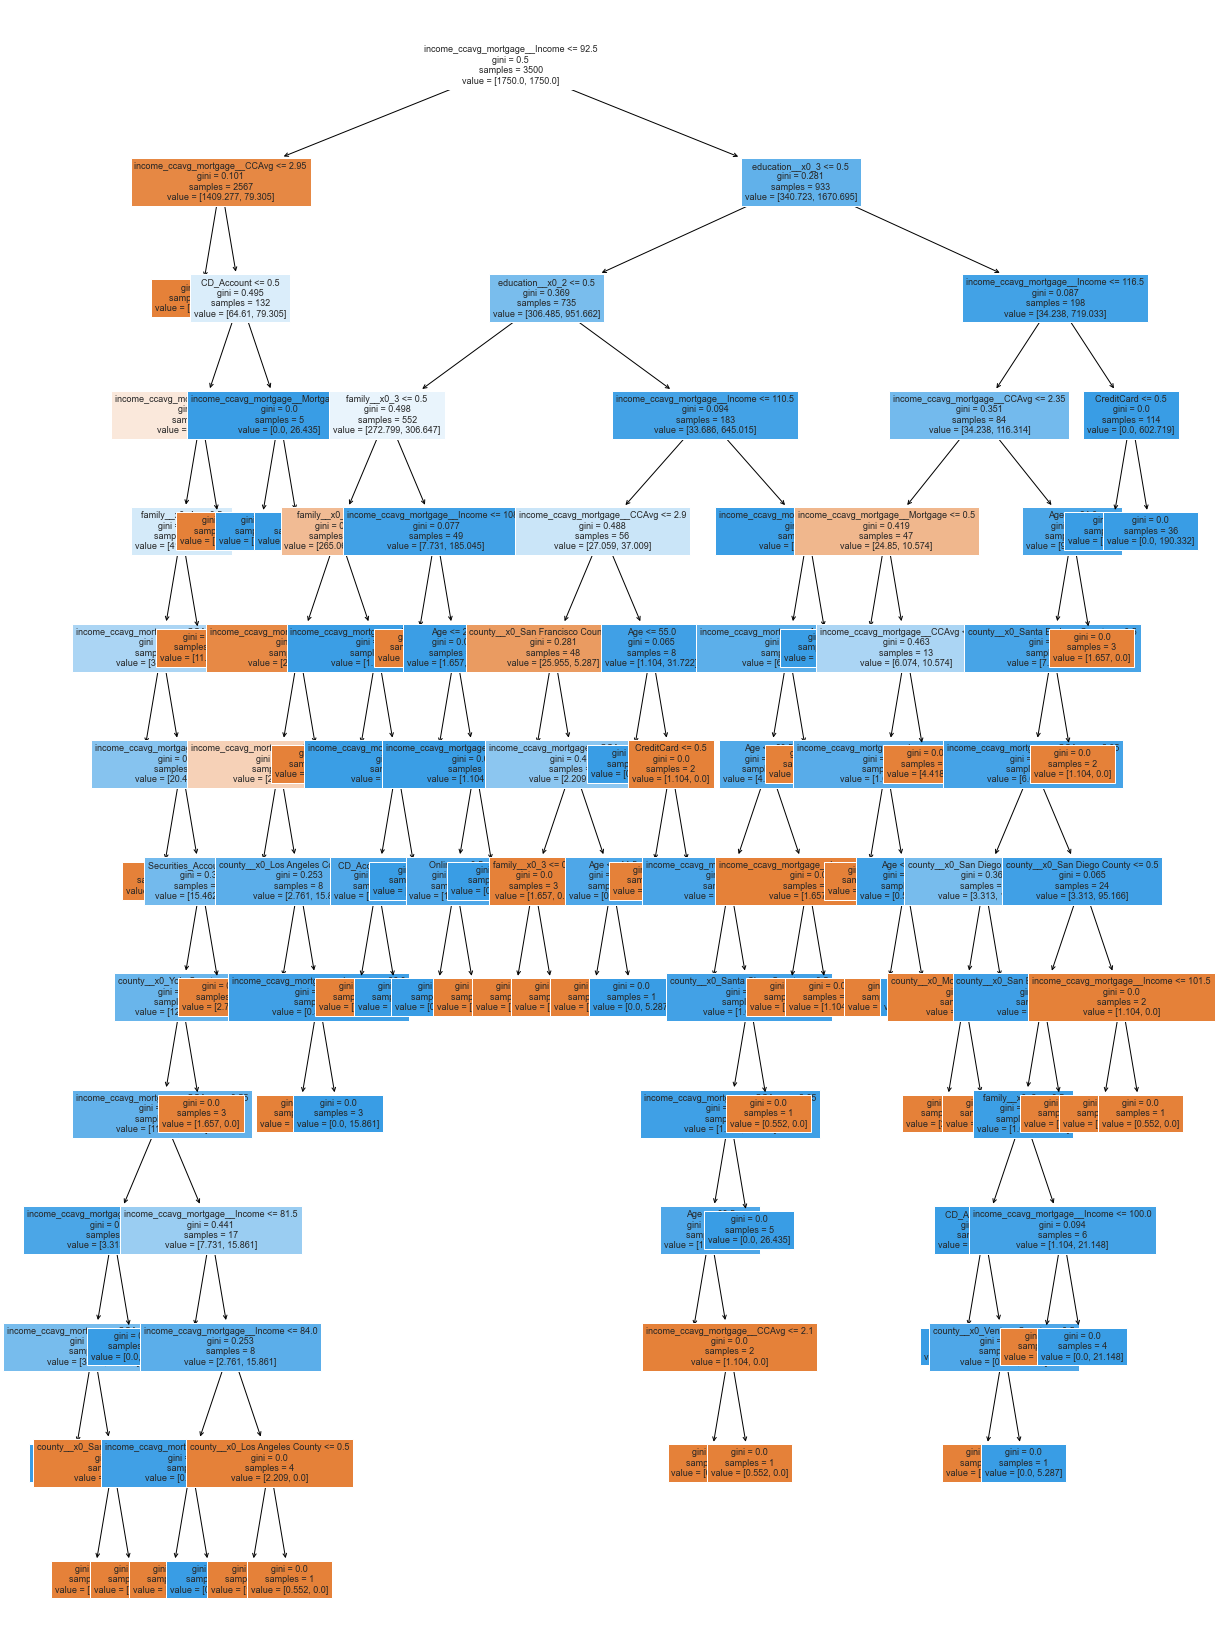

<IPython.core.display.Javascript object>

In [ ]:
show_tree(tree_model_pipeline["tree"], feature_names, (20, 30))

#### We can see that the tree is very complex and it is overfitting the train data and not generalizing well to the test data. This can be confirmed by the large differences in the model metrics for train and test data.

In [ ]:
tree_model_pipeline["tree"].tree_.max_depth

13

<IPython.core.display.Javascript object>

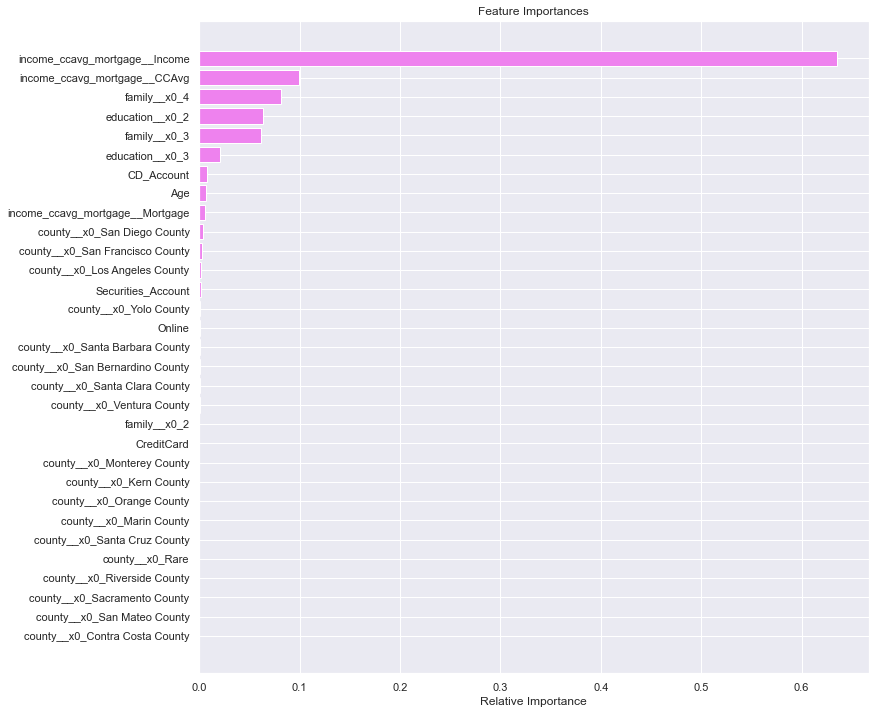

<IPython.core.display.Javascript object>

In [ ]:
show_importances(tree_model_pipeline["tree"], feature_names)

## Pre-pruning - Grid search

In [ ]:
cachedir = mkdtemp()
tree_model_pipeline_gs = Pipeline(
    steps=[
        ("encoding", tree_encoding),
        (
            "tree",
            DecisionTreeClassifier(random_state=1),
        ),
    ],
    # memory=cachedir,
)

<IPython.core.display.Javascript object>

In [ ]:
params = {
    "encoding__county__encode_type": ["ohe"],
    "encoding__education__encode_type": ["ohe", None],
    "encoding__family__encode_type": ["ohe", None],
    "encoding__income_ccavg_mortgage__income": [1.5, None],
    "encoding__income_ccavg_mortgage__CCAvg": [1.5, None],
    "encoding__income_ccavg_mortgage__mortgage": [True, False],
    "tree__class_weight": ["balanced", None],
    "tree__max_depth": [3, 5, 8],
    "tree__criterion": ["entropy", "gini"],
    "tree__splitter": ["best", "random"],
    "tree__min_impurity_decrease": [
        0.00001,
        0.001,
        0.01,
    ],
}

scoring = {
    #     "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
}

tree_grid_search = GridSearchCV(
    tree_model_pipeline_gs,
    params,
    cv=3,
    scoring=scoring,
    refit="f1",
    return_train_score=True,
)

<IPython.core.display.Javascript object>

In [ ]:
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('county',
                                                                         CustomEncoder(col='county_modified',
                                                                                       encode_type='ohe'),
                                                                         ['county_modified']),
                                                                        ('education',
                                                                         CustomEncoder(col='Education',
                                                                                       encode_type='ohe'),
                                                                         ['Education']),
                                                                        ('family',
                                                                         CustomEncoder(col='Family',
                                                                                       encode_type='ohe'),
                                                                         ['Family']),
                                                                        ('incom...
                         'encoding__income_ccavg_mortgage__income': [1.5, None],
                         'encoding__income_ccavg_mortgage__mortgage': [True,
                                                                       False],
                         'tree__class_weight': ['balanced', None],
                         'tree__criterion': ['entropy', 'gini'],
                         'tree__max_depth': [3, 5, 8],
                         'tree__min_impurity_decrease': [1e-05, 0.001, 0.01],
                         'tree__splitter': ['best', 'random']},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score)})

<IPython.core.display.Javascript object>

In [ ]:
tree_model_pipeline_gs = tree_grid_search.best_estimator_
tree_model_pipeline_gs

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_impurity_decrease=1e-05,
                                        random_state=1))])

<IPython.core.display.Javascript object>

In [ ]:
tree_model_pipeline_gs["encoding"].get_params()

{'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('county',
   CustomEncoder(col='county_modified', encode_type='ohe'),
   ['county_modified']),
  ('education', CustomEncoder(col='Education'), ['Education']),
  ('family', CustomEncoder(col='Family', encode_type='ohe'), ['Family']),
  ('income_ccavg_mortgage',
   CustomTransformer(CCAvg=1.5, income=1.5, mortgage=True),
   ['Income', 'CCAvg', 'Mortgage'])],
 'verbose': False,
 'county': CustomEncoder(col='county_modified', encode_type='ohe'),
 'education': CustomEncoder(col='Education'),
 'family': CustomEncoder(col='Family', encode_type='ohe'),
 'income_ccavg_mortgage': CustomTransformer(CCAvg=1.5, income=1.5, mortgage=True),
 'county__col': 'county_modified',
 'county__encode_type': 'ohe',
 'education__col': 'Education',
 'education__encode_type': None,
 'family__col': 'Family',
 'family__encode_type': 'ohe',
 'income_ccavg_mortgage__CCAvg': 1.5,
 'income_ccavg_mort

<IPython.core.display.Javascript object>

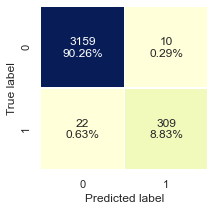

,Accuracy,Recall,Precision,F1
0,0.990857,0.933535,0.968652,0.950769


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_gs, X_train, y_train)

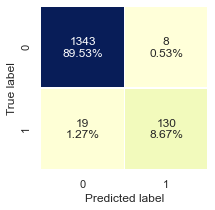

,Accuracy,Recall,Precision,F1
0,0.982,0.872483,0.942029,0.905923


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_gs, X_test, y_test)

In [ ]:
tree_train_results = pd.concat(
    [tree_train_results, get_tree_metrics(tree_model_pipeline_gs, X_train, y_train)],
    axis=1,
)
tree_test_results = pd.concat(
    [tree_test_results, get_tree_metrics(tree_model_pipeline_gs, X_test, y_test)],
    axis=1,
)

<IPython.core.display.Javascript object>

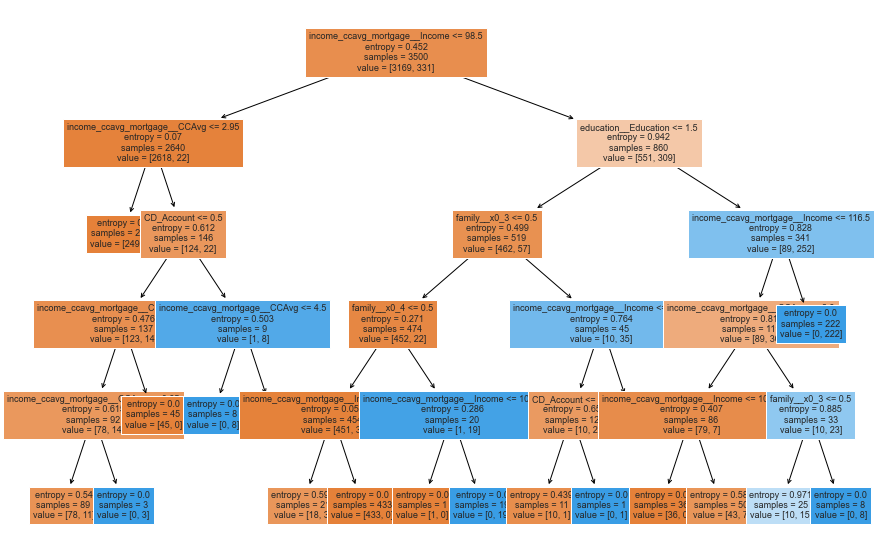

<IPython.core.display.Javascript object>

In [ ]:
show_tree(
    tree_model_pipeline_gs["tree"],
    tree_model_pipeline_gs["encoding"].get_feature_names(),
)

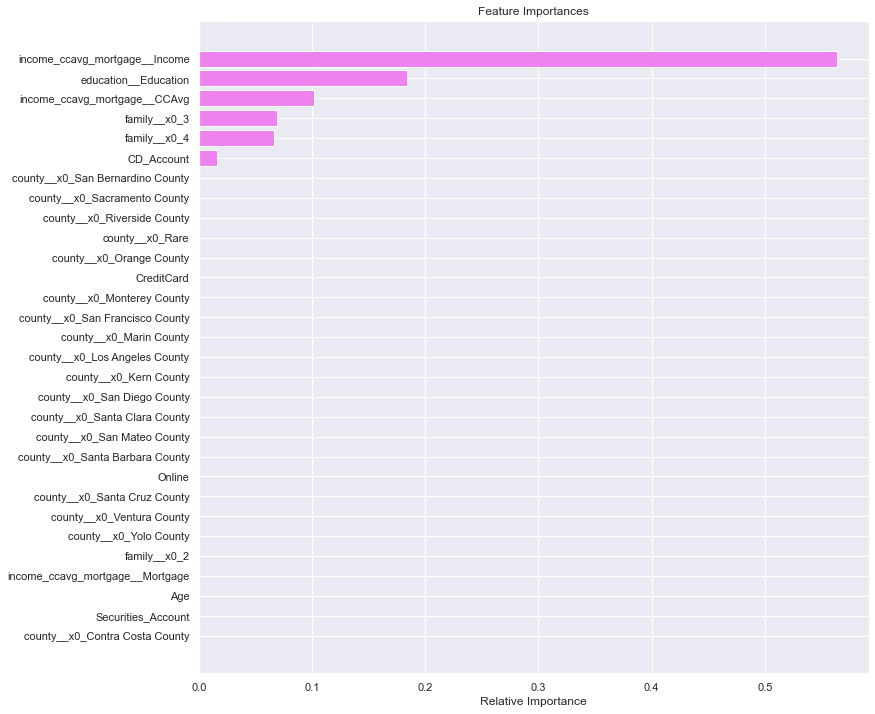

<IPython.core.display.Javascript object>

In [ ]:
show_importances(
    tree_model_pipeline_gs["tree"],
    tree_model_pipeline_gs["encoding"].get_feature_names(),
)

## Pre-pruning using F Beta score

F beta is the generalized form of F1 score (F1 score is a special case of F beta with beta = 1). Using the value of beta, can control the emphasis on False Negatives and False Positives. 

**Beta > 1 : More attention on minimizing false negatives <br>
Beta < 1 : More attention on minimizing false positives**

In this case, use **beta>1** to minimize false negatives

In [ ]:
from sklearn.metrics import fbeta_score

<IPython.core.display.Javascript object>

In [ ]:
def f_beta(y, y_pred):
    return fbeta_score(y, y_pred, beta=10) ## beta > 1

<IPython.core.display.Javascript object>

In [ ]:
cachedir = mkdtemp()
tree_model_pipeline_gs2 = Pipeline(
    steps=[
        ("encoding", tree_encoding),
        (
            "tree",
            DecisionTreeClassifier(random_state=1),
        ),
    ],
    memory=cachedir,
)

<IPython.core.display.Javascript object>

In [ ]:
params2 = {
    "encoding__county__encode_type": ["ohe", None],
    "encoding__education__encode_type": ["ohe", None],
    "encoding__family__encode_type": ["ohe", None],
    "encoding__income_ccavg_mortgage__income": [1.5],
    "encoding__income_ccavg_mortgage__CCAvg": [1.5],
    "encoding__income_ccavg_mortgage__mortgage": [True],
    "tree__class_weight": ["balanced", None],
    "tree__max_depth": [2, 3, 5, 6, 7],
    "tree__criterion": ["entropy", "gini"],
    "tree__splitter": ["best", "random"],
    "tree__min_impurity_decrease": [0.00001, 0.001, 0.01],
}

scoring2 = {
    #     "recall": make_scorer(recall_score),
    # "f1": make_scorer(f1_score),
    "f_beta": make_scorer(f_beta)
}

tree_grid_search2 = GridSearchCV(
    tree_model_pipeline_gs2,
    params2,
    cv=3,
    scoring=scoring2,
    refit="f_beta",
    return_train_score=True,
)

<IPython.core.display.Javascript object>

In [ ]:
tree_grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmpgy1_3b3l',
                                steps=[('encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('county',
                                                                         CustomEncoder(col='county_modified',
                                                                                       encode_type='ohe'),
                                                                         ['county_modified']),
                                                                        ('education',
                                                                         CustomEncoder(col='Education',
                                                                                       encode_type='ohe'),
                                                                         ['Education']),
                                                                        ('family',
                                                                         Cust...
                         'encoding__income_ccavg_mortgage__income': [1.5],
                         'encoding__income_ccavg_mortgage__mortgage': [True],
                         'tree__class_weight': ['balanced', None],
                         'tree__criterion': ['entropy', 'gini'],
                         'tree__max_depth': [2, 3, 5, 6, 7],
                         'tree__min_impurity_decrease': [1e-05, 0.001, 0.01],
                         'tree__splitter': ['best', 'random']},
             refit='f_beta', return_train_score=True,
             scoring={'f_beta': make_scorer(f_beta)})

<IPython.core.display.Javascript object>

In [ ]:
tree_model_pipeline_gs2 = tree_grid_search2.best_estimator_
tree_model_pipeline_gs2

Pipeline(memory='C:\\Users\\harsh\\AppData\\Local\\Temp\\tmpgy1_3b3l',
         steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=2,
                                        min_impurity_decrease=1e-05,
                                        random_state=1))])

<IPython.core.display.Javascript object>

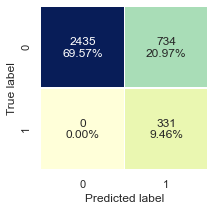

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_gs2, X_train, y_train)

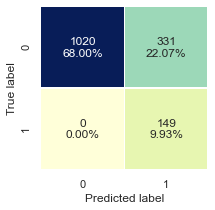

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_gs2, X_test, y_test)

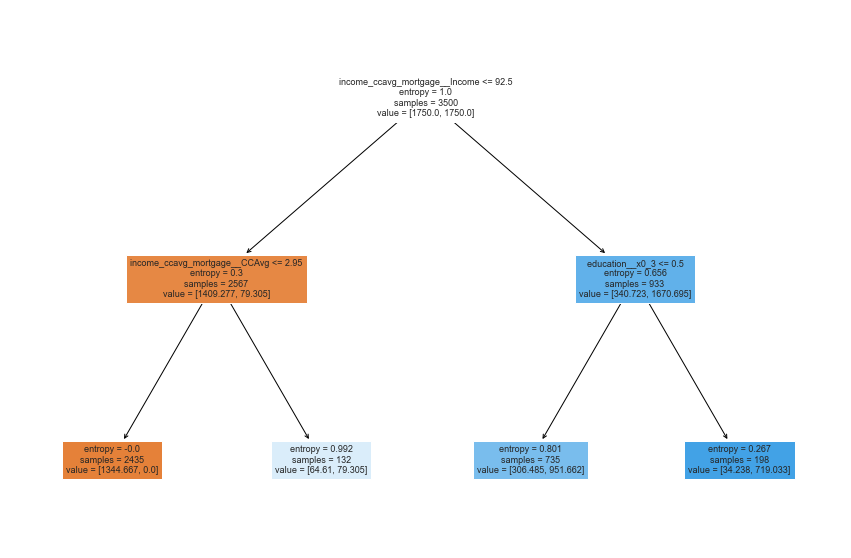

<IPython.core.display.Javascript object>

In [ ]:
show_tree(
    tree_model_pipeline_gs2["tree"],
    tree_model_pipeline_gs2["encoding"].get_feature_names(),
)

In [ ]:
tree_train_results = pd.concat(
    [tree_train_results, get_tree_metrics(tree_model_pipeline_gs2, X_train, y_train)],
    axis=1,
)
tree_test_results = pd.concat(
    [tree_test_results, get_tree_metrics(tree_model_pipeline_gs2, X_test, y_test)],
    axis=1,
)

<IPython.core.display.Javascript object>

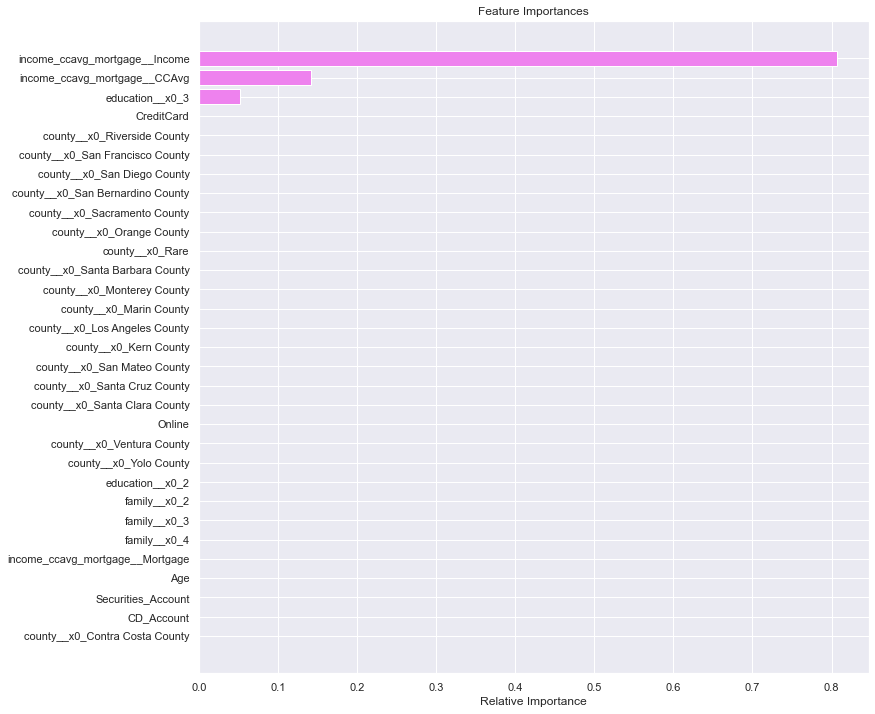

<IPython.core.display.Javascript object>

In [ ]:
show_importances(
    tree_model_pipeline_gs2["tree"],
    tree_model_pipeline_gs2["encoding"].get_feature_names(),
)

## Post-Pruning

start with the full grown tree initial tree.

In [ ]:
tree_model_pipeline_alpha = clone(tree_model_pipeline)

<IPython.core.display.Javascript object>

In [ ]:
encoded_X_train = tree_model_pipeline["encoding"].transform(X_train)

path = tree_model_pipeline_alpha["tree"].cost_complexity_pruning_path(
    encoded_X_train, y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.932622e-16
1,3.153047e-19,-7.929469e-16
2,3.853725e-19,-7.925615e-16
3,3.853725e-19,-7.921761e-16
4,4.729571e-19,-7.917032e-16
5,5.255079e-19,-7.911777e-16
6,7.707449e-19,-7.904069e-16
7,7.882619e-19,-7.896186e-16
8,1.786727e-18,-7.878319e-16
9,1.257806e-17,-7.752539e-16


<IPython.core.display.Javascript object>

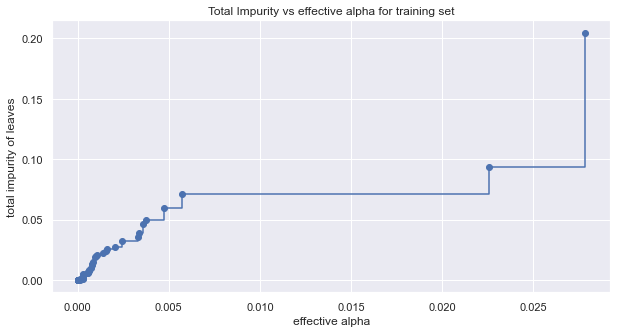

<IPython.core.display.Javascript object>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1,
        ccp_alpha=ccp_alpha,
        class_weight="balanced",
        criterion="gini",
    )
    clf.fit(encoded_X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923147


<IPython.core.display.Javascript object>

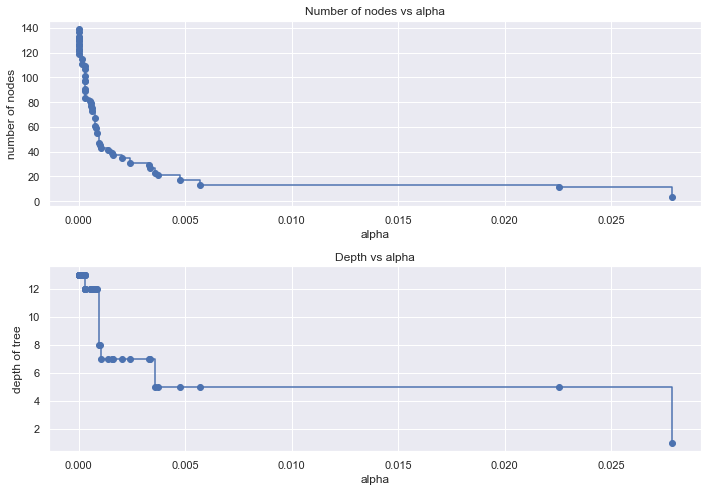

<IPython.core.display.Javascript object>

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(encoded_X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [ ]:
encoded_X_test = tree_model_pipeline["encoding"].transform(X_test)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(encoded_X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [ ]:
train_scores = [clf.score(encoded_X_train, y_train) for clf in clfs]
test_scores = [clf.score(encoded_X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

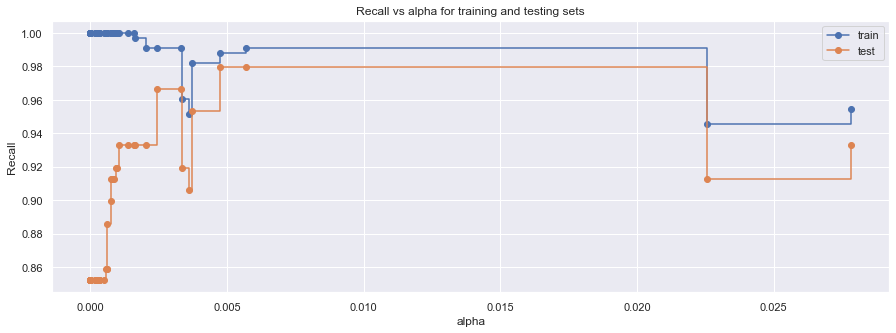

<IPython.core.display.Javascript object>

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ccp_alphas[(ccp_alphas > 0.02)]

array([0.02414003, 0.02765098, 0.05587856, 0.08684845])

<IPython.core.display.Javascript object>

#### Selecting alpha = 0.00571 for the best recall on the test set

In [ ]:
tree_model_pipeline_alpha_best = Pipeline(
    steps=[
        ("encoding", clone(tree_encoding)),
        (
            "tree",
            DecisionTreeClassifier(
                ccp_alpha=0.0057,
                class_weight="balanced",
                random_state=1,
                criterion="gini",
            ),
        ),
    ],
)


tree_model_pipeline_alpha_best.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('county',
                                                  CustomEncoder(col='county_modified',
                                                                encode_type='ohe'),
                                                  ['county_modified']),
                                                 ('education',
                                                  CustomEncoder(col='Education',
                                                                encode_type='ohe'),
                                                  ['Education']),
                                                 ('family',
                                                  CustomEncoder(col='Family',
                                                                encode_type='ohe'),
                                                  ['Family']),
                                                 ('income_ccavg_mortgage',
                                                  CustomTransformer(CCAvg=1.5,
                                                                    income=1.5,
                                                                    mortgage=True),
                                                  ['Income', 'CCAvg',
                                                   'Mortgage'])])),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0057,
                                        class_weight='balanced',
                                        random_state=1))])

<IPython.core.display.Javascript object>

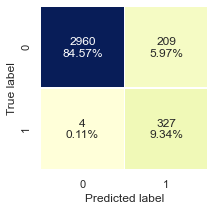

,Accuracy,Recall,Precision,F1
0,0.939143,0.987915,0.610075,0.754325


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_alpha_best, X_train, y_train)

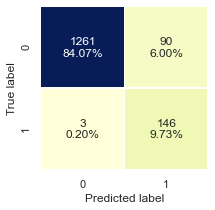

,Accuracy,Recall,Precision,F1
0,0.938,0.979866,0.618644,0.758442


<IPython.core.display.Javascript object>

In [ ]:
show_tree_performance(tree_model_pipeline_alpha_best, X_test, y_test)

In [ ]:
tree_train_results = pd.concat(
    [
        tree_train_results,
        get_tree_metrics(tree_model_pipeline_alpha_best, X_train, y_train),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [ ]:
tree_test_results = pd.concat(
    [
        tree_test_results,
        get_tree_metrics(tree_model_pipeline_alpha_best, X_test, y_test),
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

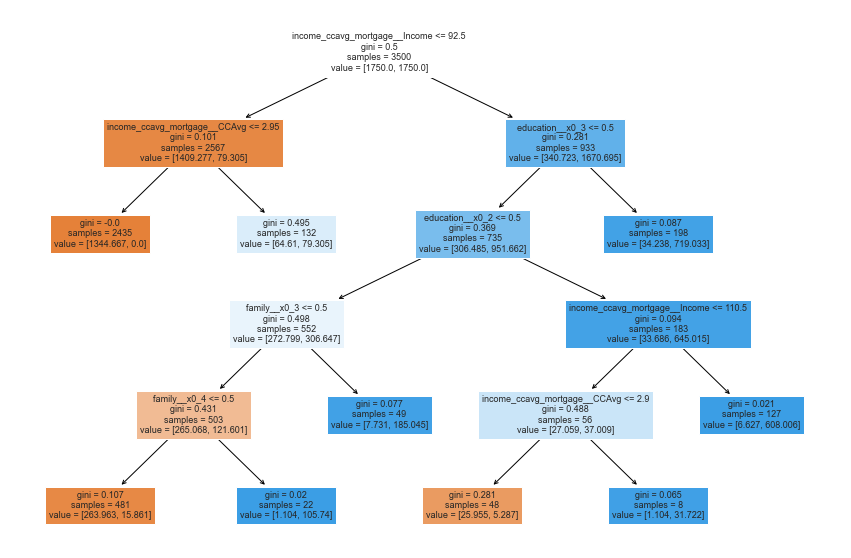

<IPython.core.display.Javascript object>

In [ ]:
show_tree(
    tree_model_pipeline_alpha_best["tree"],
    tree_model_pipeline_alpha_best["encoding"].get_feature_names(),
)

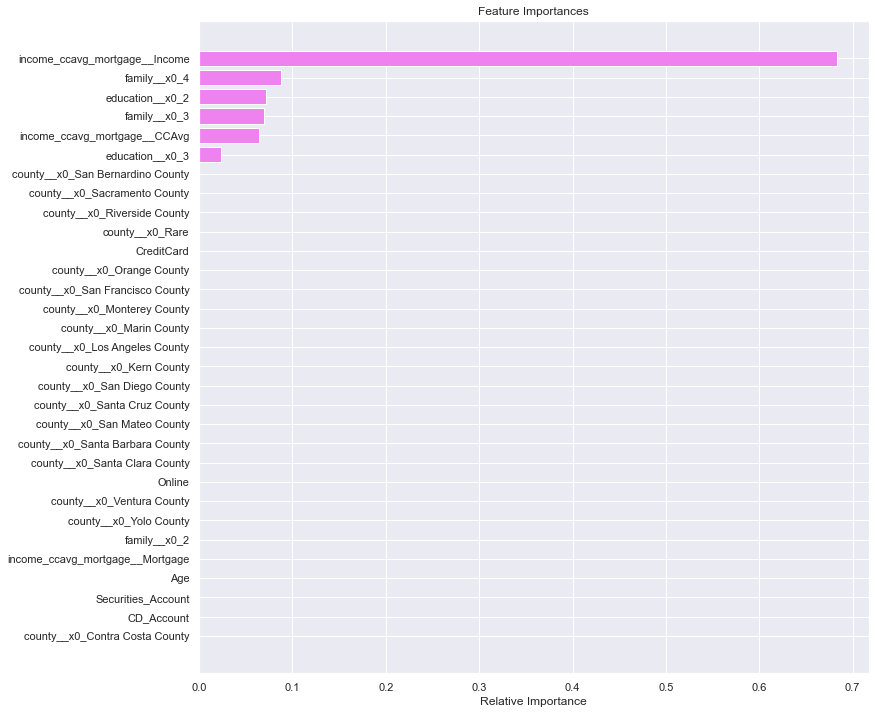

<IPython.core.display.Javascript object>

In [ ]:
show_importances(
    tree_model_pipeline_alpha_best["tree"],
    tree_model_pipeline_alpha_best["encoding"].get_feature_names(),
)

In [ ]:
tree_train_results.columns = [
    "initial tree",
    "pre-pruned tree: gridSearch",
    "pre-pruned tree: gridSearch F beta",
    "post-pruned tree: alpha=0.00571",
]
tree_test_results.columns = [
    "initial tree",
    "pre-pruned tree: gridSearch",
    "pre-pruned tree: gridSearch F beta",
    "post-pruned tree: alpha=0.00571",
]

<IPython.core.display.Javascript object>

In [ ]:
print("-" * 25)
print("Training Performance")
print("-" * 25)
display(tree_train_results)
print()
print("-" * 25)
print("Test Performance")
print("-" * 25)
display(tree_test_results)

-------------------------
Training Performance
-------------------------


,initial tree,pre-pruned tree: gridSearch,pre-pruned tree: gridSearch F beta,post-pruned tree: alpha=0.00571
Accuracy,1.0,0.990857,0.790286,0.939143
Recall,1.0,0.933535,1.000000,0.987915
Precision,1.0,0.968652,0.310798,0.610075
F1,1.0,0.950769,0.474212,0.754325



-------------------------
Test Performance
-------------------------


,initial tree,pre-pruned tree: gridSearch,pre-pruned tree: gridSearch F beta,post-pruned tree: alpha=0.00571
Accuracy,0.979333,0.982000,0.779333,0.938000
Recall,0.852349,0.872483,1.000000,0.979866
Precision,0.933824,0.942029,0.310417,0.618644
F1,0.891228,0.905923,0.473768,0.758442


<IPython.core.display.Javascript object>

**Observation**

Selecting the best model actually depends on the resources the bank can spare for the upcoming campaign:
1. If they have **absolutely no limit on resources** and their only goal is to acquire as many potential customers as possible, **"pre-pruned tree: gridSearch F beta"** would be the way to go.
2. If they have **limited resources** to spare and want a **more conservative approach**, **"post-pruned tree: alpha=0.00571"** would work.
3. But, if **resources are absolutely critical** and rooting out the unfavourable customrs is very important, then **"pre-pruned tree: gridSearch"** would be the way to go.

<br>
<br>
<br>
<br>

# Recommendations and Insights

For reaching our goal of building a classification model for targeting and acquiring as many new "asset" customers, customers who would purchase a loan from the bank, we first did an EDA and then built some logistic regression and decision tree models.

Primarily focused on improving the precision of models. Of course, didn't absolutely abandon the precision of our models; it was important to keep that in check as well.

The main insights from analysis above:

1. Income and CCAvg are important in determining the Customer behaviour. High income and high spending customers were much more likely to opt for the loan. It is better to focus on customers who have either CCAvg > 3 OR Income > 110K.

2. Education played an important role in the behaviour as well. 2 and 3 education level customers were generally more likely to opt for the loan.
3. Family was also an important variable. 3 and 4 membered families were much more likely to opt for the loan.

4. Overall, location was not that important.

The importance of different features suggested by the models varied, but overall, following following features were the most important ones:

* Income
* CCAvg
* Education
* Family
* CD_Account